<a href="https://colab.research.google.com/github/kaluznys/uczenie_maszynowe_UW/blob/main/Lab08_automatic-gradient-training-loop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Working with Other Loss Functions**

-------------------------------

During the class today, we reconstructed an **ellipse**. The ellipse was defined with two **foci** and $C$ (the sum of distances of the ellipse points from the foci).

To reconstruct the ellipse through optimization, we began with **$N$ points** scattered randomly in the 2D plane. Our goal was to adjust their positions so that they satisfy the elliptical constraint as closely as possible. We achieved this by minimizing the **error-related loss**, $L^{(2)}_{\text{ellipse}}$ which was defined in today's class with $\ell_2$ norm as:

$$
L^{(2)}_{\text{ellipse}} = \frac{1}{N} \sum_{i=1}^{N} \epsilon_i^2
$$

where
$$
 \epsilon_i = d_{i1} + d_{i2} - C
$$
where $N$ is the number of points, and $d_{i1}, d_{i2}$ are their distances to the two foci.

In the homework assignment you will experiment with 3 other loss definitions based on some other possible norms.



1. $\ell_0$ norm resulting in
  $$
  L^{(0)}_{\text{ellipse}} = \frac{1}{N} \sum_{i=1}^{N} \mathbf{1}(\epsilon_i \neq 0)
  $$
  - If you actually succeed to code this loss function, the question for you to answer in relation to $L^{(0)}_{\text{ellipse}}$ is why the training is not progressing with passing epochs.
  - If you actually fail to code this loss function, the question for you to answer is to explain the failure and reason out theoretically, why the training would not be progressing with passing epochs, anyway.

1. $\ell_1$ norm resulting in
  $$
  L^{(1)}_{\text{ellipse}} = \frac{1}{N} \sum_{i=1}^{N} |\epsilon_i|
  $$
  The question for you to answer in relation to $L^{(1)}_{\text{ellipse}}$ is why the training loss doesn't converge, even after the ellipse has been fully drawn.

1. $\ell_\infty$ norm resulting in
  $$
  L^{(\infty)}_{\text{ellipse}} =  \max_{i} |\epsilon_i|
  $$
  The question for you to answer in relation to $L^{(\infty)}_{\text{ellipse}}$ is why the training takes so long and it doesn't converge in the end, either.

## **Points to Note**

1. Draw both the shape that the points draw as they move, and the loss value after each epoch, just as we did in class today.

2. Note, that the purpose of this excercise is not that you reconstruct a perfect ellipse, but rather that you give it a try, and even if you fail you should document and explain the failure, and answer a question related to a given loss definition.

3. You can also play around with the learning rate to try to improve convergence.

## **Task & Deliverables**
  
   - Document your experiments (python code and charts) and **write down your conclusions** into the Colab notebook.
   - It is not strictly required, but **if you make a movie showing the optimization progress it will be considered a strong point of your solution**
     - You can make a movie programmatically as we did in clustering class (our second class) with EM clustering,
     - or, you can save to disk the image files with epoch charts and use an external tool to bind them into a movie. Provide links to movie files in the README.
   - Place the Colab notebook  with the solution in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook (and any movies you created) and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.

## Sample code

   You can use the sample code provided below:



In [ ]:
def plot_results(epoch, trajectories, loss_history=None):
    if loss_history is not None:
      fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    else:
      fig, axes = plt.subplots(1, 1, figsize=(6, 6))
      axes = [axes]
    points = np.array([trajectories[i][-1] for i in range(num_points)])
    # Left plot: Scatter of points with trajectories
    axes[0].scatter(points[:, 0], points[:, 1], label=f'Points - Epoch {epoch}')
    f1 = focus1.detach().cpu().numpy()
    f2 = focus2.detach().cpu().numpy()
    axes[0].scatter([f1[0], f2[0]], [f1[1], f2[1]], color='red', marker='x', s=100, label='Foci')

    # Draw movement traces
    for i in range(num_points):
        trajectory = np.array(trajectories[i])
        axes[0].plot(trajectory[:, 0], trajectory[:, 1], color='gray', linestyle='-', linewidth=0.5)

    axes[0].set_xlabel('X')
    axes[0].set_ylabel('Y')
    axes[0].legend()


    axes[0].grid()

    if loss_history is not None:
      axes[0].set_title(f'Points after Epoch {epoch}')
      # Right plot: Loss history
      axes[1].plot(loss_history, color='blue')
      axes[1].set_xlabel("Epoch")
      axes[1].set_ylabel("Loss")
      axes[1].set_title("Loss Convergence")
      axes[1].grid()
    else:
      axes[0].set_title(f'Points before Epoch {epoch}')

    plt.show()

In [ ]:
def plot_starting(points):
  points_n = points.detach().numpy()
  plt.gcf().set_size_inches(5.5, 5.5)
  plt.scatter(points_n[:, 0], points_n[:, 1], label=f'generated Points', c ="blue")
  plt.scatter([focus1[0], focus2[0]], [focus1[1], focus2[1]], color='red', marker='x', s=100, label='Foci')
  plt.grid()
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.legend()
  plt.title('Starting Points')
  plt.show()

# Loss $L^1$

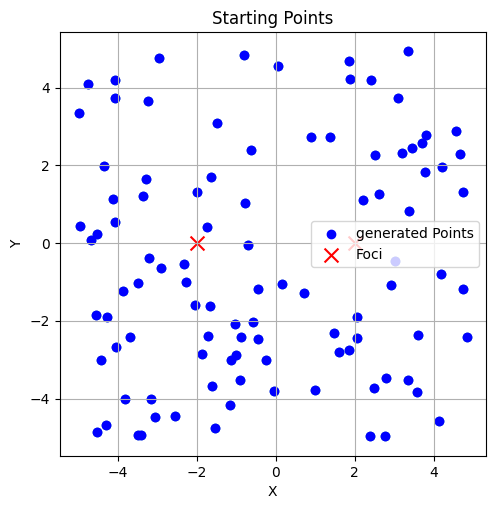

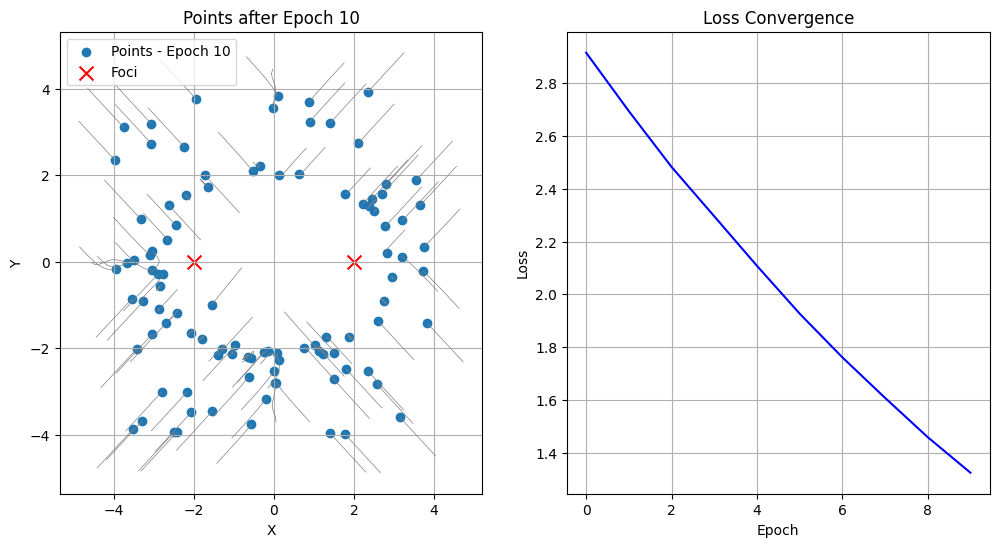

Epoch 10: Loss = 1.325012


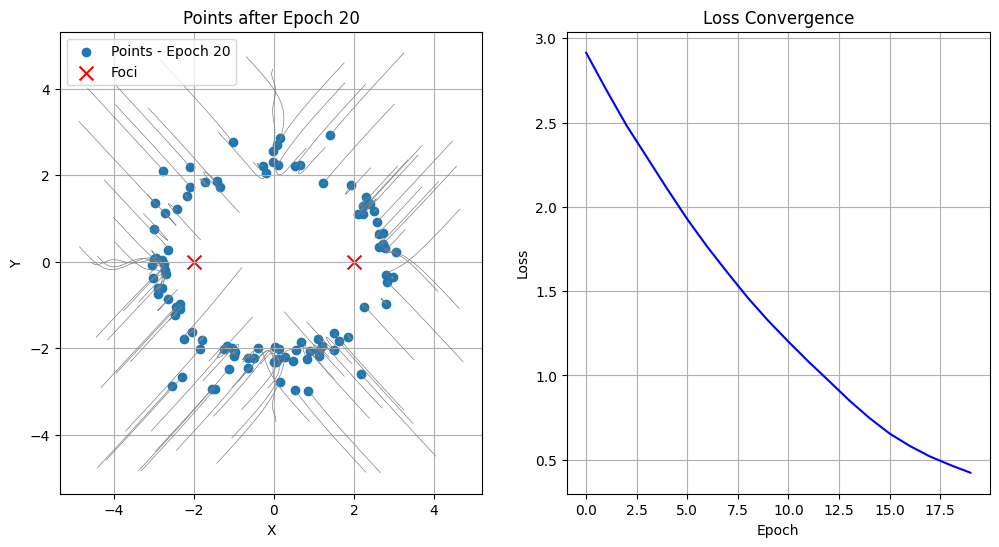

Epoch 20: Loss = 0.422803


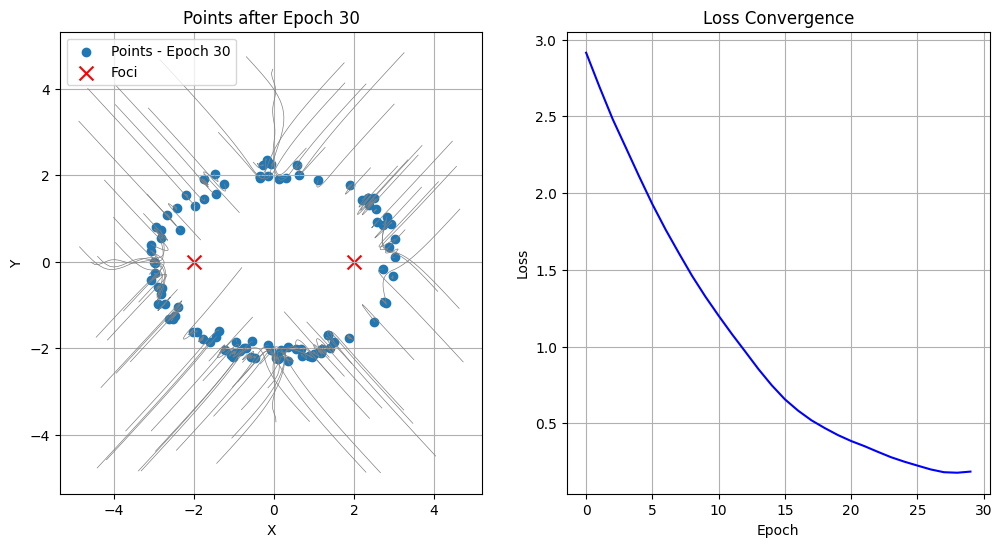

Epoch 30: Loss = 0.184727


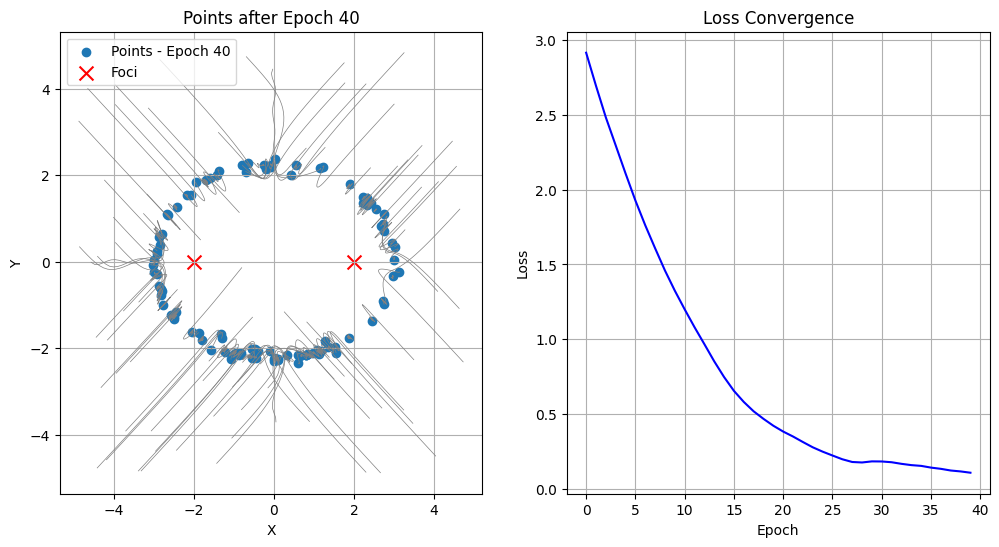

Epoch 40: Loss = 0.108961


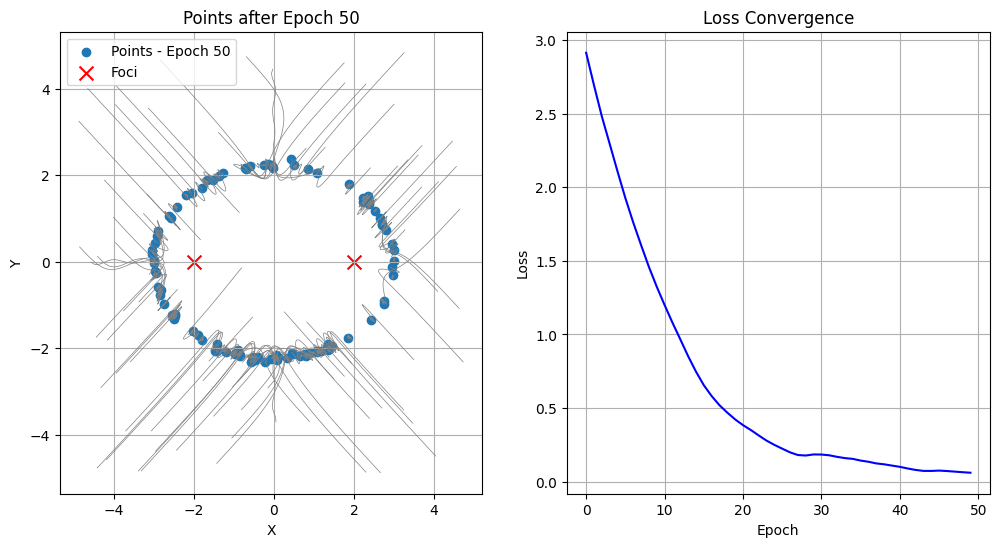

Epoch 50: Loss = 0.060492


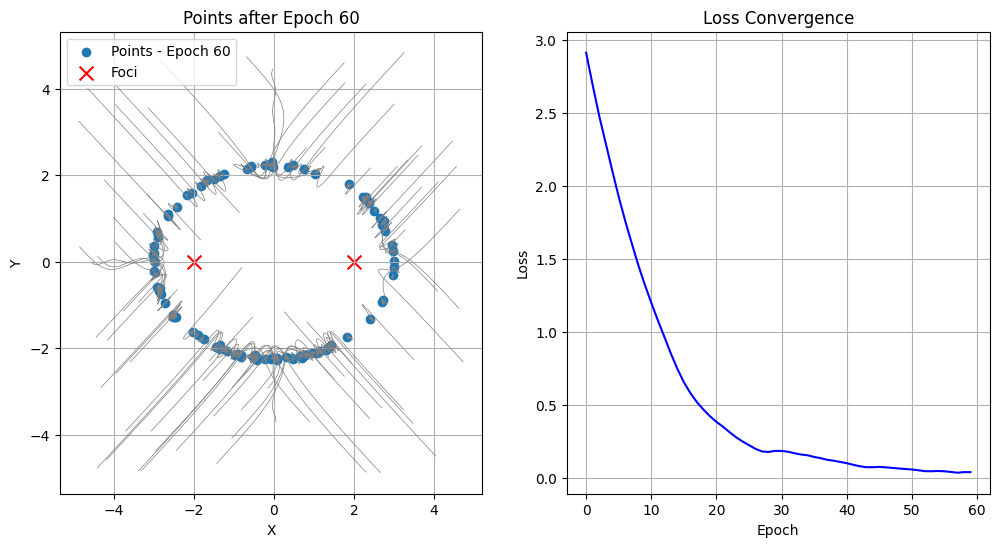

Epoch 60: Loss = 0.039098


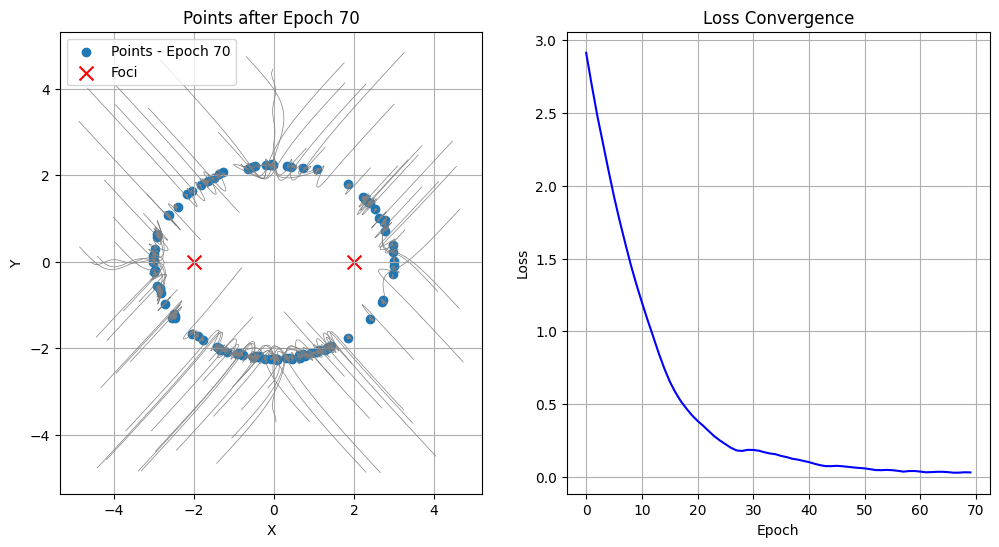

Epoch 70: Loss = 0.029680


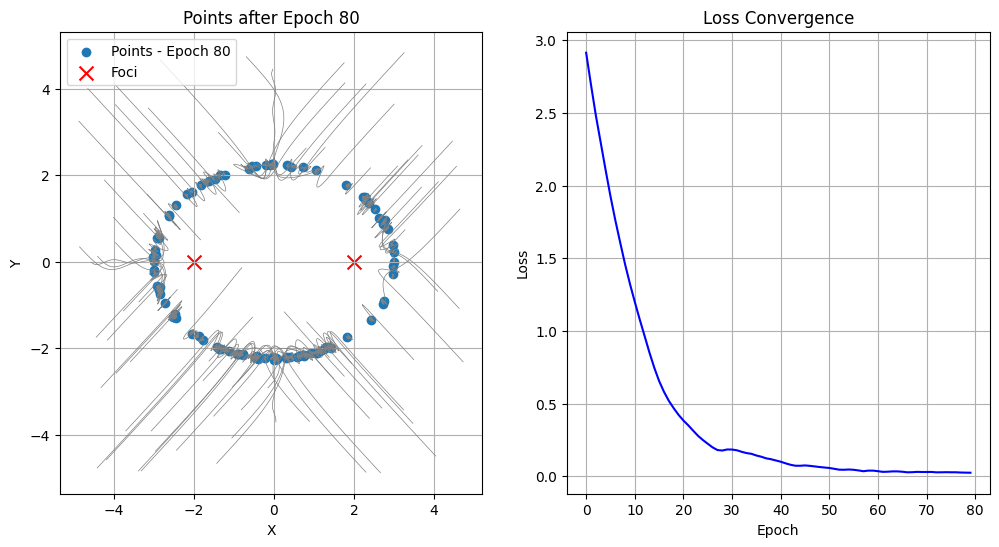

Epoch 80: Loss = 0.024692


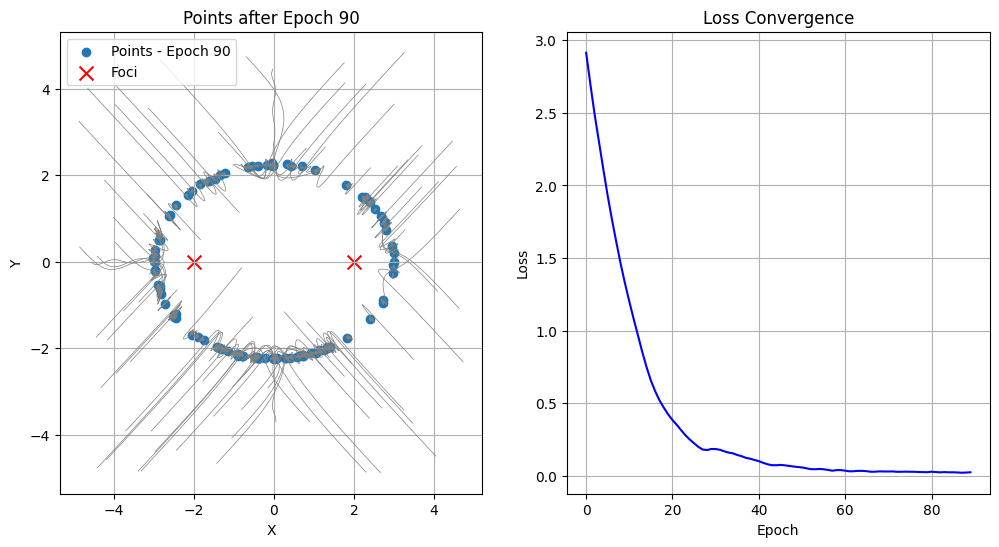

Epoch 90: Loss = 0.024182


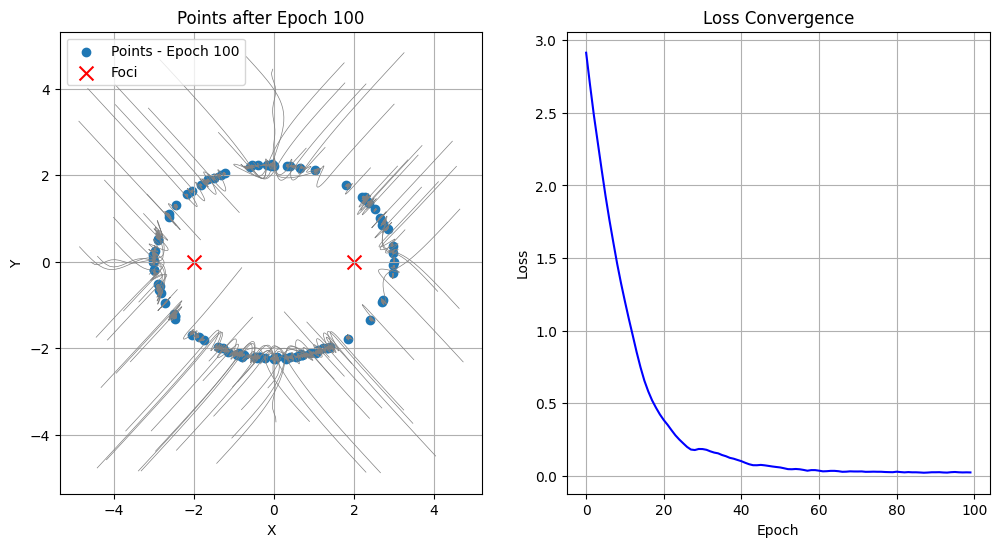

Epoch 100: Loss = 0.023075
Elapsed time: 6.262680292129517 seconds


In [ ]:
trajectories = [[] for _ in range(num_points)]
loss_l1_history = []
num_points = 100
points = torch.rand((num_points, 2)) * 10 - 5  # Uniformly distributed in [-5, 5]
points.requires_grad = True
points_n = points.detach().numpy()
plt.scatter(points_n[:, 0], points_n[:, 1], )
import time
# Start timing
start_time = time.time()

# plot start
plot_starting(points)
# Define optimizer
optimizer = torch.optim.Adam([points], lr=0.1)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    dist1 = torch.norm(points - focus1, dim=1)
    dist2 = torch.norm(points - focus2, dim=1)
    loss_l1 = torch.mean(torch.abs(dist1 + dist2 - constant_sum))

    loss_l1.backward()
    optimizer.step()
    loss_l1_history.append(loss_l1.item())
    optimizer.zero_grad()
    for i in range(num_points):
        trajectories[i].append(points[i].detach().cpu().clone().numpy())

    # Plot results every 10th epoch
    if (epoch+1) % 10 == 0:
        plot_results(epoch+1, trajectories, loss_l1_history)
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}: Loss = {loss_l1.item():.6f}")


# End timing
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

The question for you to answer in relation to  L^1 ellipse  is why the training loss doesn't converge, even after the ellipse has been fully drawn.

Funkcja straty pozwala punktom w znaczący sposób zbliżyć się do elipsy, jednak ze względu na to że j ta współrzędna gradientu w punkcie x_j wynosi $∇∣ϵ∣=sign(ϵ_i)⋅(\frac{x_i−f_1}{∥x_i−f_1∥}+\frac{x_i−f_2}{∥x_i−f_2∥})$, stąd nie wynika bezpośrednio, że wartość gradientu (modułów jego współrzędnych zależy bezpośrednio od wartości $ϵ_i$, a jedynie od jej znaku, stąd hipoteza, iż zbyt duża wartość gradientu w okolicach elipsy może skutkować przeskoczeniem punktu na drugą stronę elipsy (np.do wewnątrz), a następnie wykonaniu podobnego ruchu w drugą stronę co utrudnia zbieżność i czyni oscylacje niestabilnymi. Widać to na wykresach powyżej gdzie punkty przekraczają granicę wyznaczoną przez elipsę a następnie wracają (szare linie). Można się też o tym przekonać ustawiając większy learning rate. Poniżej mamy skrajny przykład takiego wyboru.

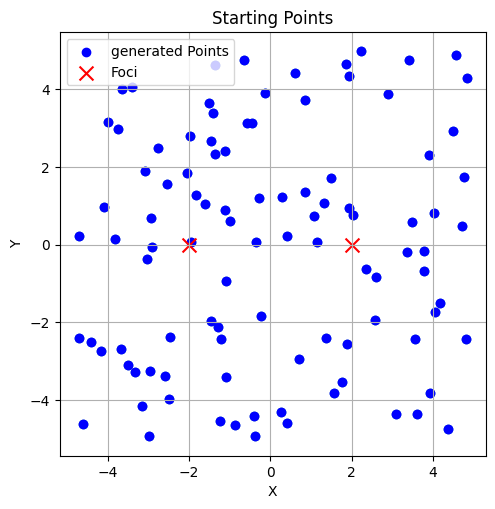

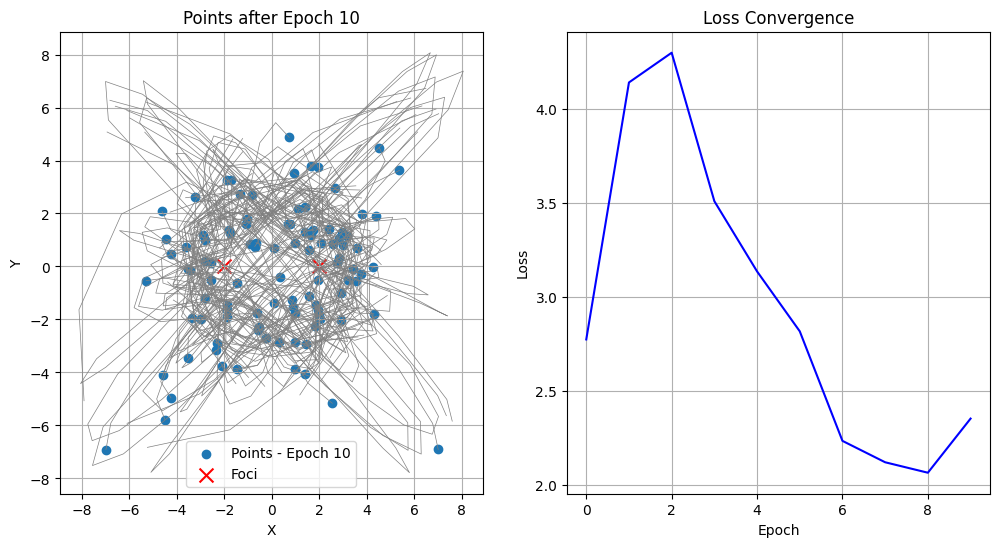

Epoch 10: Loss = 2.354130


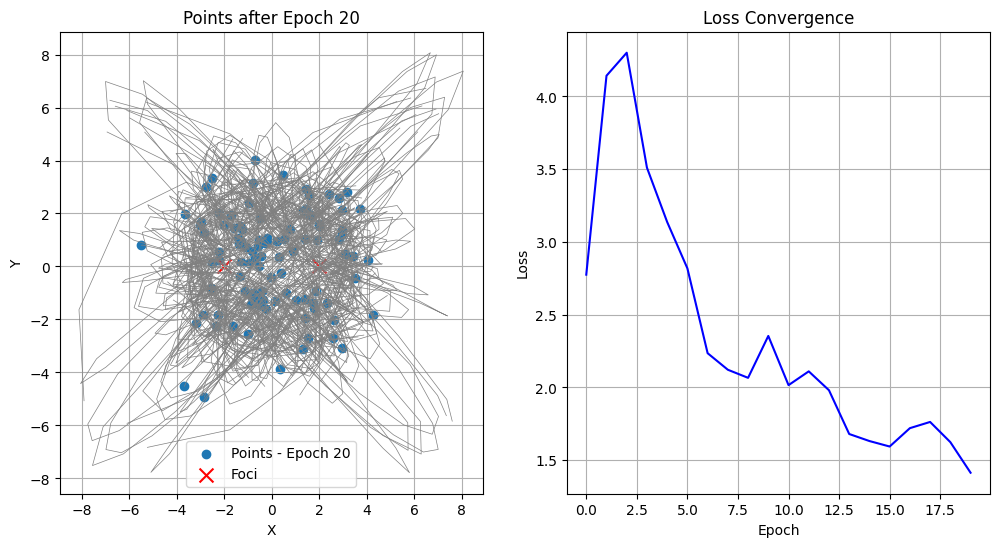

Epoch 20: Loss = 1.414113


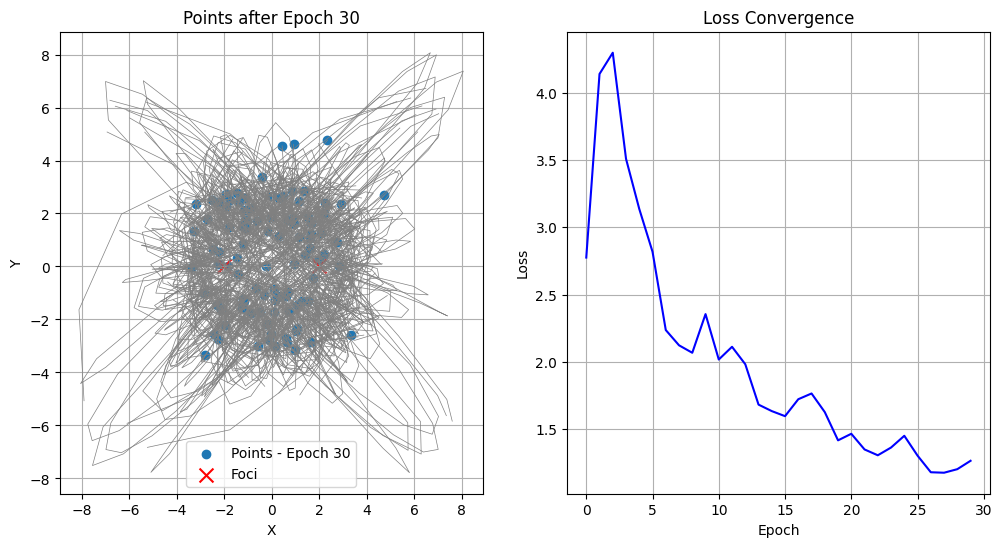

Epoch 30: Loss = 1.261904


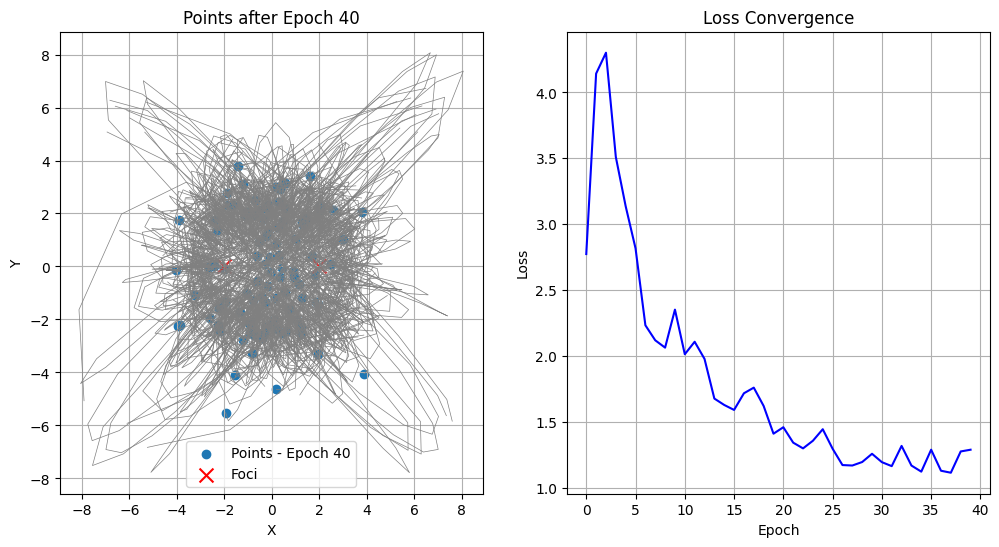

Epoch 40: Loss = 1.292804


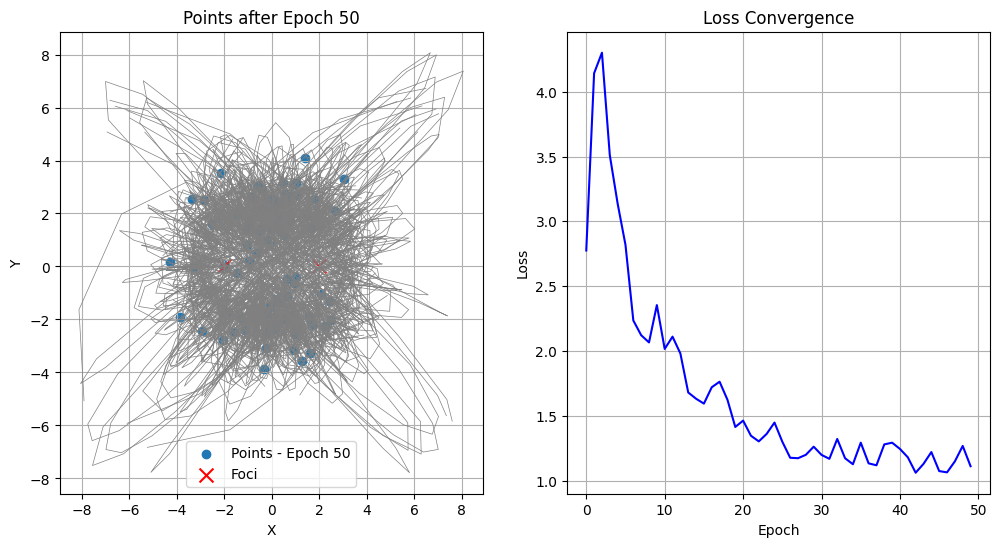

Epoch 50: Loss = 1.111316


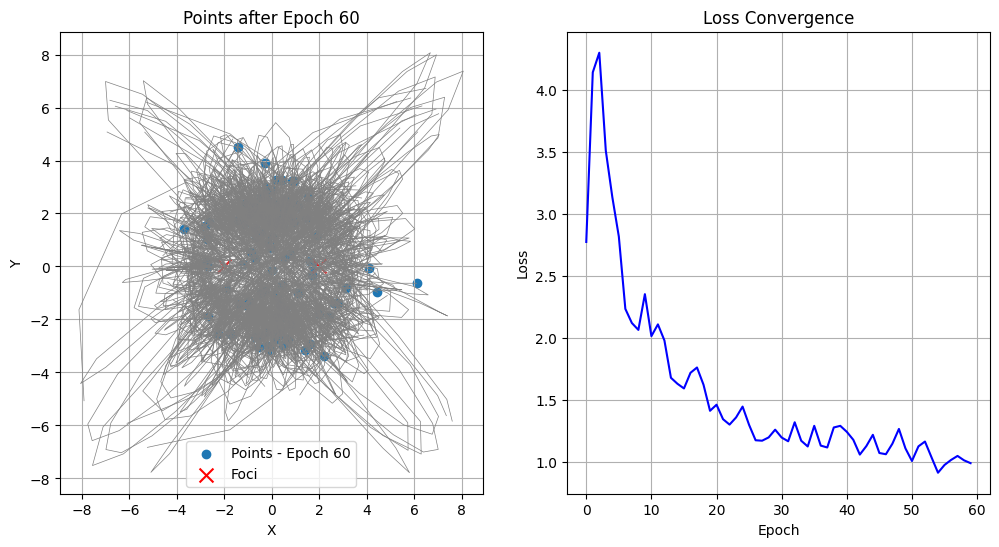

Epoch 60: Loss = 0.991966


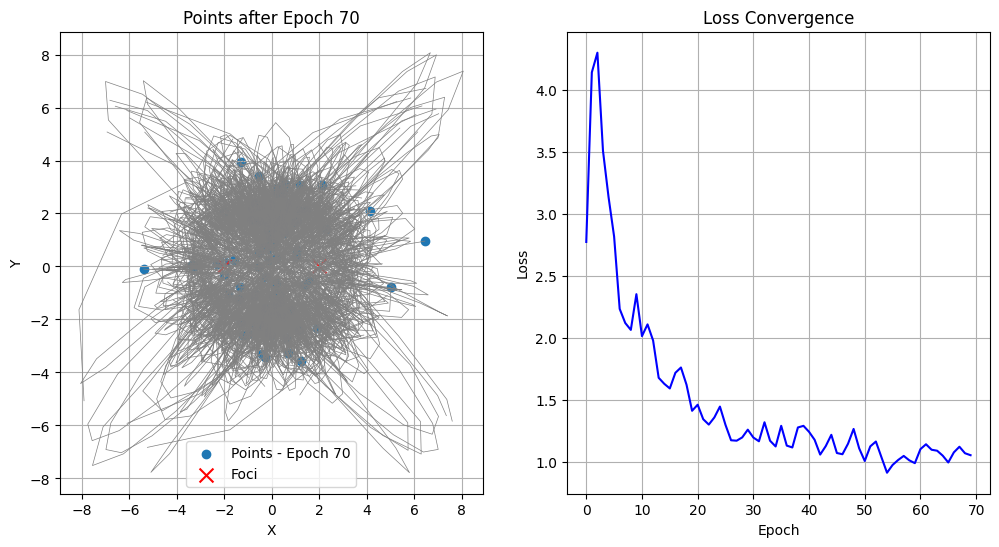

Epoch 70: Loss = 1.056123


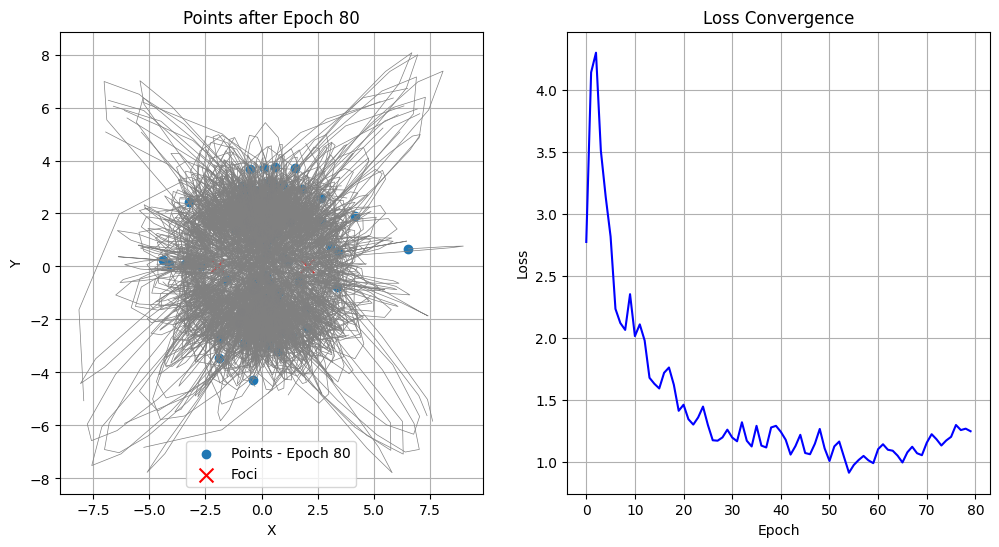

Epoch 80: Loss = 1.249299


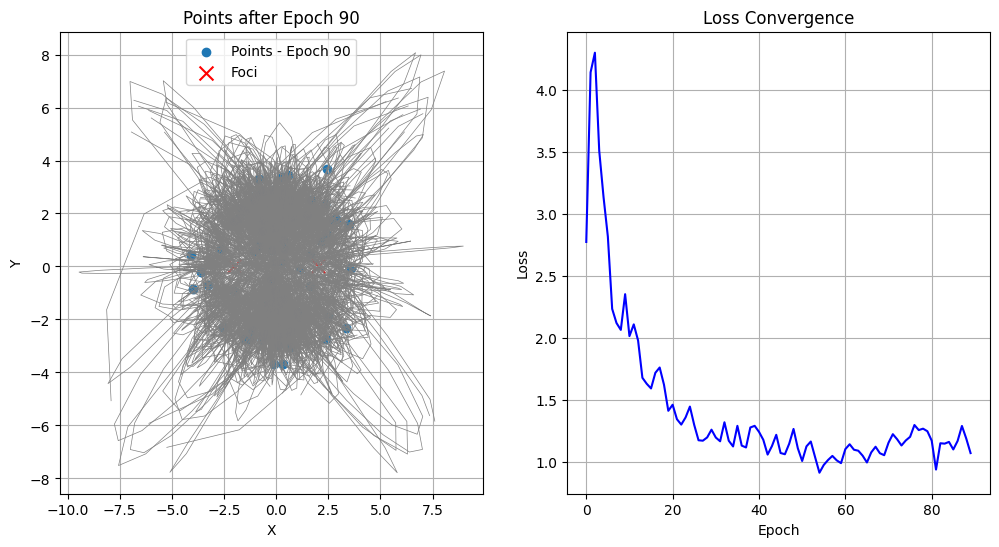

Epoch 90: Loss = 1.073113


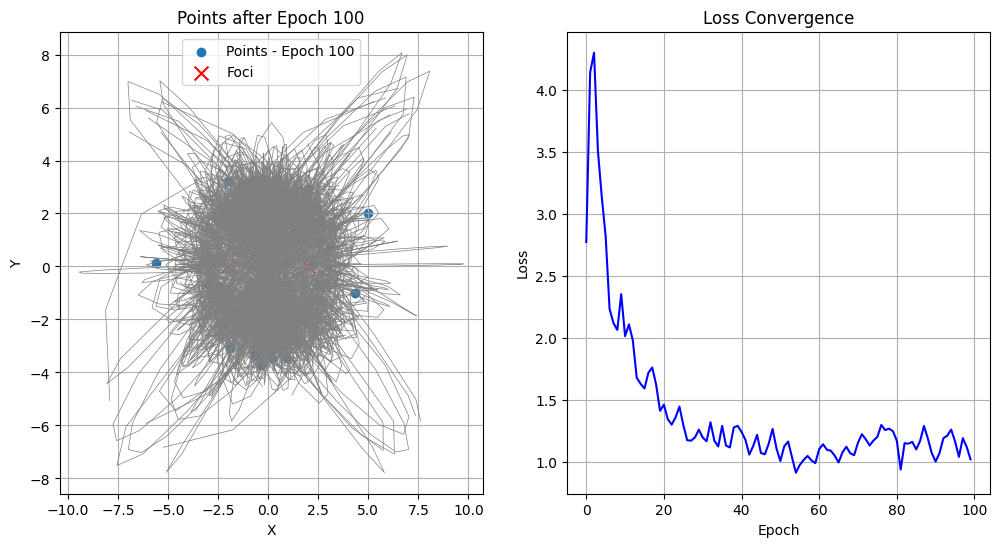

Epoch 100: Loss = 1.022757
Elapsed time: 7.453808307647705 seconds


In [ ]:
trajectories = [[] for _ in range(num_points)]
loss_l1_history = []
num_points = 100
points = torch.rand((num_points, 2)) * 10 - 5  # Uniformly distributed in [-5, 5]
points.requires_grad = True
points_n = points.detach().numpy()
plt.scatter(points_n[:, 0], points_n[:, 1], )
import time
# Start timing
start_time = time.time()

# plot start
plot_starting(points)
# Define optimizer
optimizer = torch.optim.Adam([points], lr=5)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    dist1 = torch.norm(points - focus1, dim=1)
    dist2 = torch.norm(points - focus2, dim=1)
    loss_l1 = torch.mean(torch.abs(dist1 + dist2 - constant_sum))

    loss_l1.backward()
    optimizer.step()
    loss_l1_history.append(loss_l1.item())
    optimizer.zero_grad()
    for i in range(num_points):
        trajectories[i].append(points[i].detach().cpu().clone().numpy())

    # Plot results every 10th epoch
    if (epoch+1) % 10 == 0:
        plot_results(epoch+1, trajectories, loss_l1_history)
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}: Loss = {loss_l1.item():.6f}")


# End timing
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Powyższe skłania nas do konkluzji, że być może skoro punkty w przeciągu 100 iteracji są w stanie zbliżyć się do elipsy a następnie oscylować wokół niej dobrać mniejszy współczynnik przez który mnożymy wektor z którym mamy iść w kierunku elipsy. Dla algorytmu gradient descend jest to wektor przeciwny do gradientu w danym punkcie. Wówczas kroki punktów byłyby mniejsze. Jednocześnie potrzeba by były na tyle duże by zdołać zbliżyć się do elipsy, może nawet przekroczyć. Pozwoliłyby zmniejszyć one oscylacje punktów wokół obwodu elipsy. Sprawdźmy czy przy tej liczbie epok zmniejszenie parametru dwukrotnie pomoże.

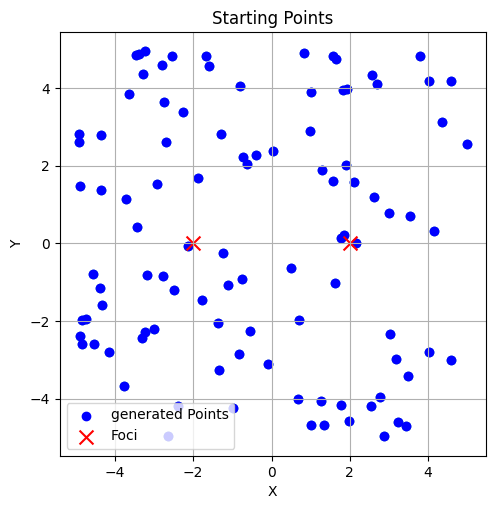

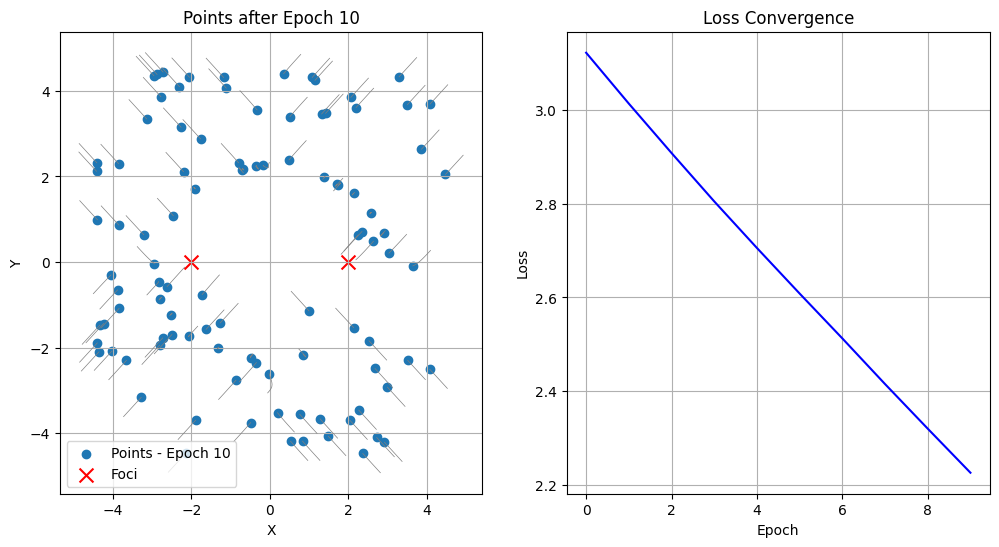

Epoch 10: Loss = 2.225763


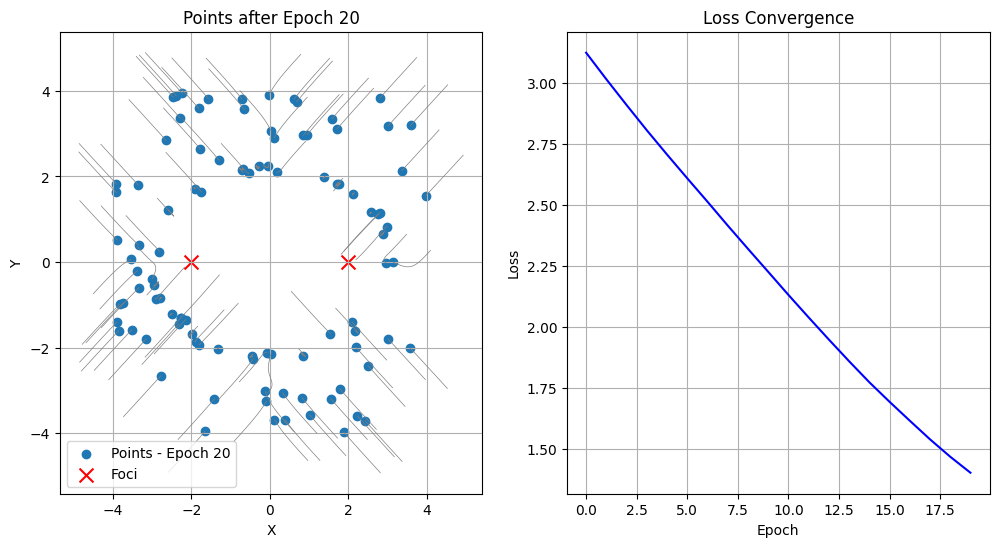

Epoch 20: Loss = 1.402985


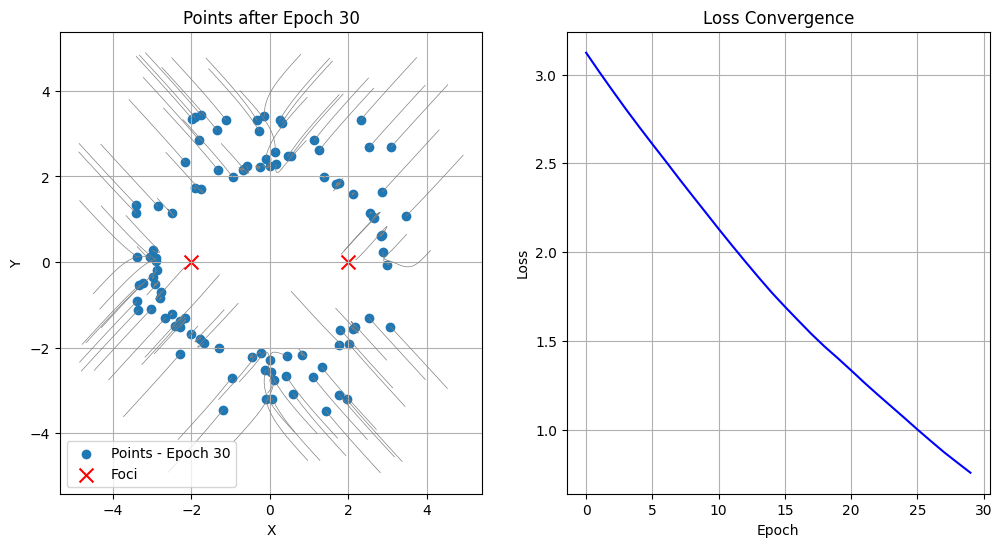

Epoch 30: Loss = 0.759040


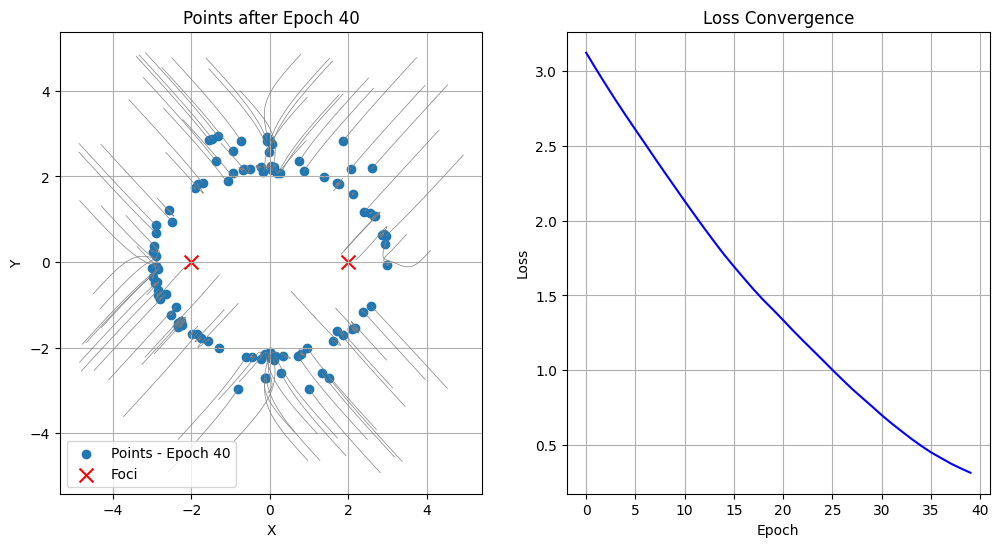

Epoch 40: Loss = 0.315395


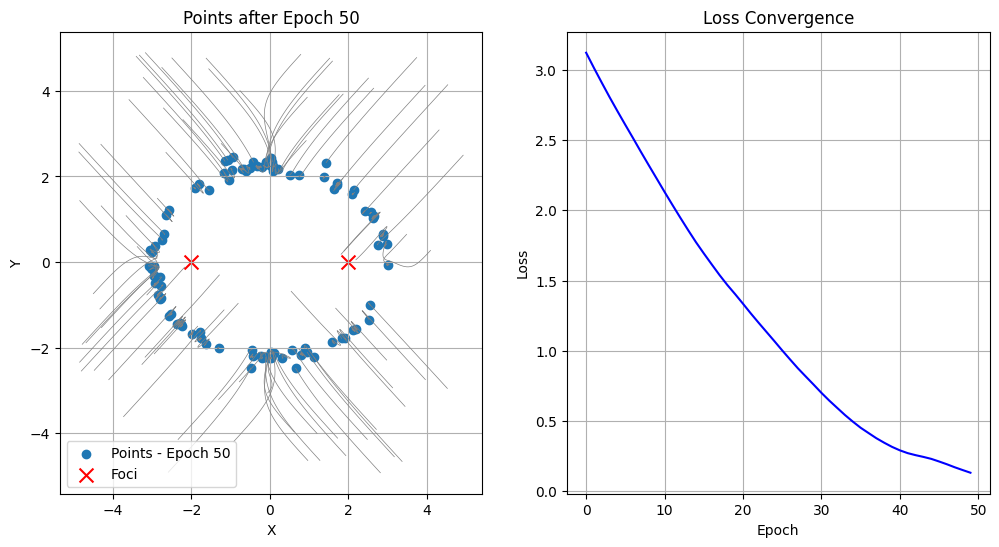

Epoch 50: Loss = 0.131191


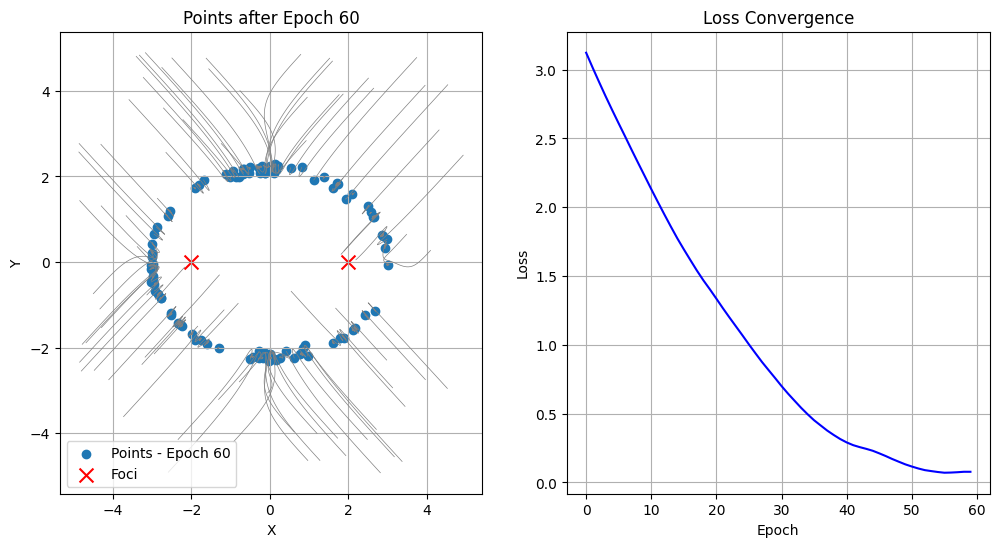

Epoch 60: Loss = 0.077130


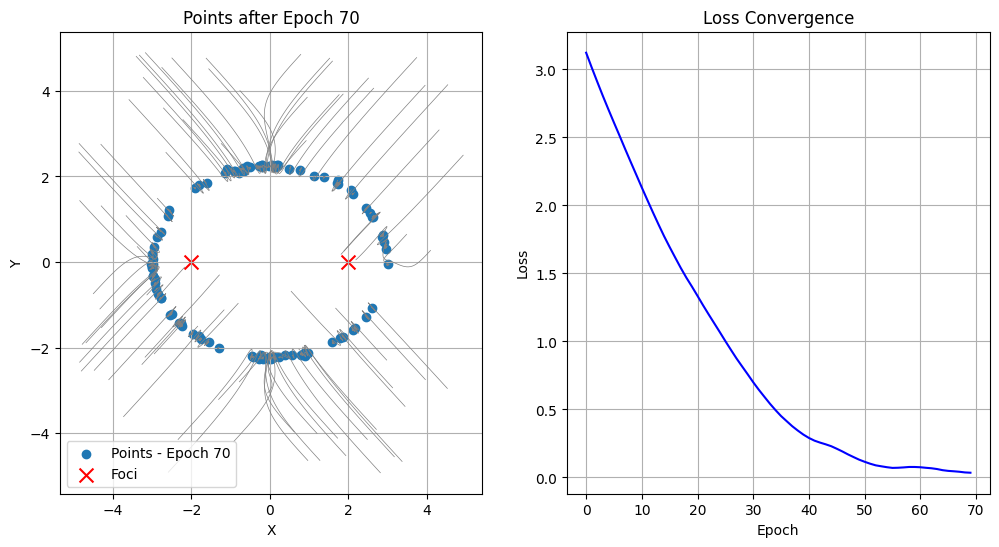

Epoch 70: Loss = 0.034935


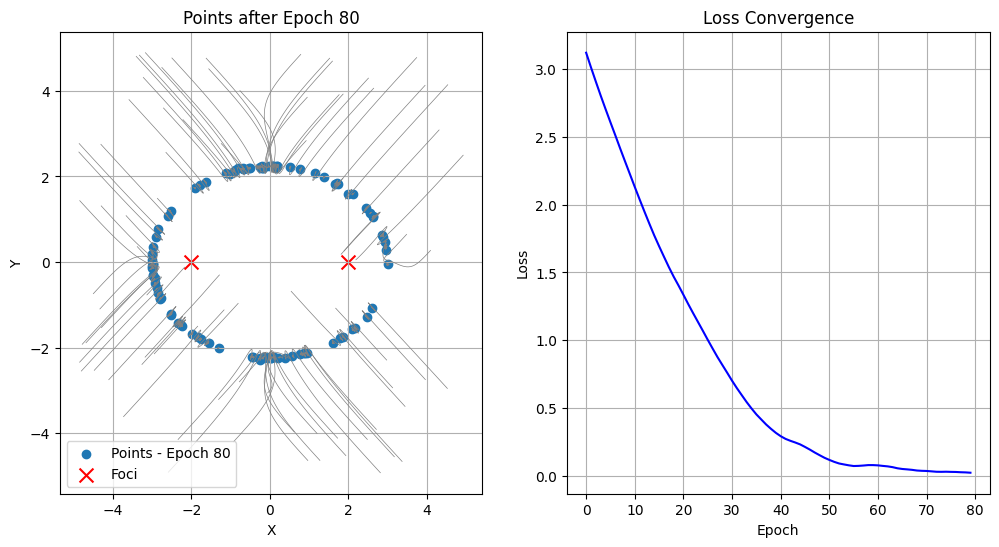

Epoch 80: Loss = 0.020886


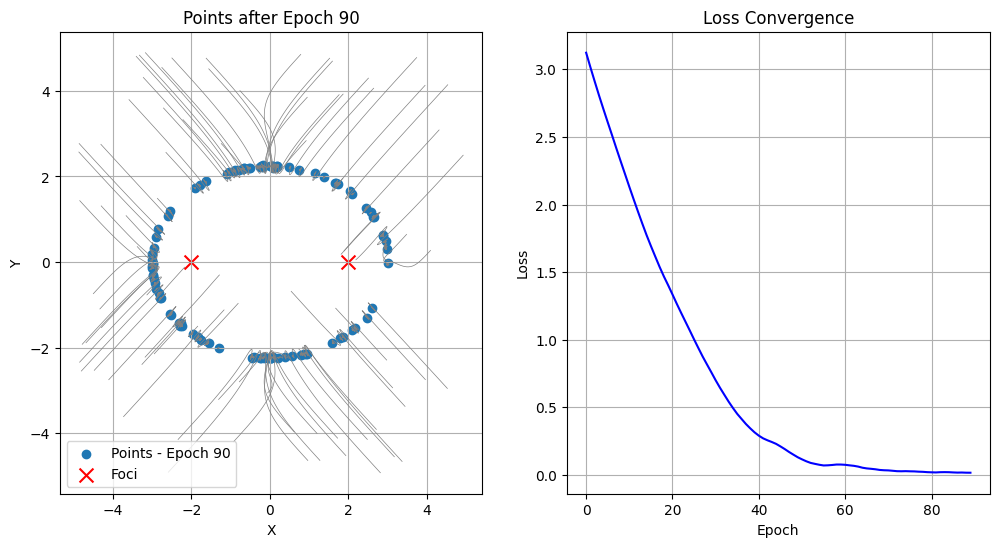

Epoch 90: Loss = 0.016673


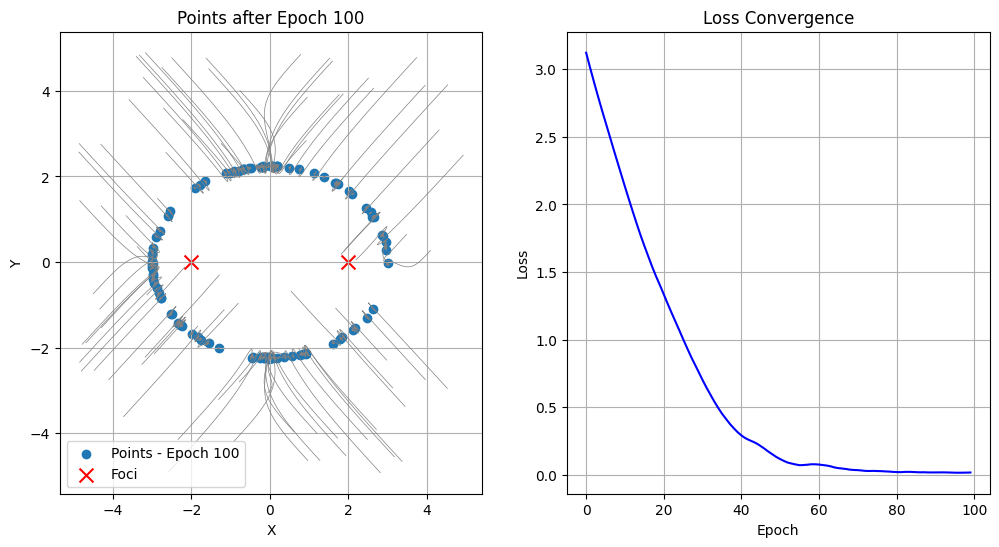

Epoch 100: Loss = 0.016235
Elapsed time: 5.355493783950806 seconds


In [ ]:
trajectories = [[] for _ in range(num_points)]
loss_l1_history = []
num_points = 100
points = torch.rand((num_points, 2)) * 10 - 5  # Uniformly distributed in [-5, 5]
points.requires_grad = True
points_n = points.detach().numpy()
plt.scatter(points_n[:, 0], points_n[:, 1], )
import time
# Start timing
start_time = time.time()

# plot start
plot_starting(points)
# Define optimizer
optimizer = torch.optim.Adam([points], lr=0.05)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    dist1 = torch.norm(points - focus1, dim=1)
    dist2 = torch.norm(points - focus2, dim=1)
    loss_l1 = torch.mean(torch.abs(dist1 + dist2 - constant_sum))

    loss_l1.backward()
    optimizer.step()
    loss_l1_history.append(loss_l1.item())
    optimizer.zero_grad()
    for i in range(num_points):
        trajectories[i].append(points[i].detach().cpu().clone().numpy())

    # Plot results every 10th epoch
    if (epoch+1) % 10 == 0:
        plot_results(epoch+1, trajectories, loss_l1_history)
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}: Loss = {loss_l1.item():.6f}")


# End timing
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Istotnie, ostateczny loss się zmniejszył.

# Loss $L^{∞}$

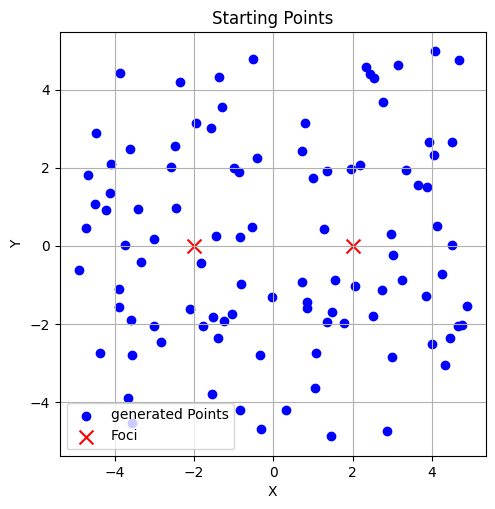

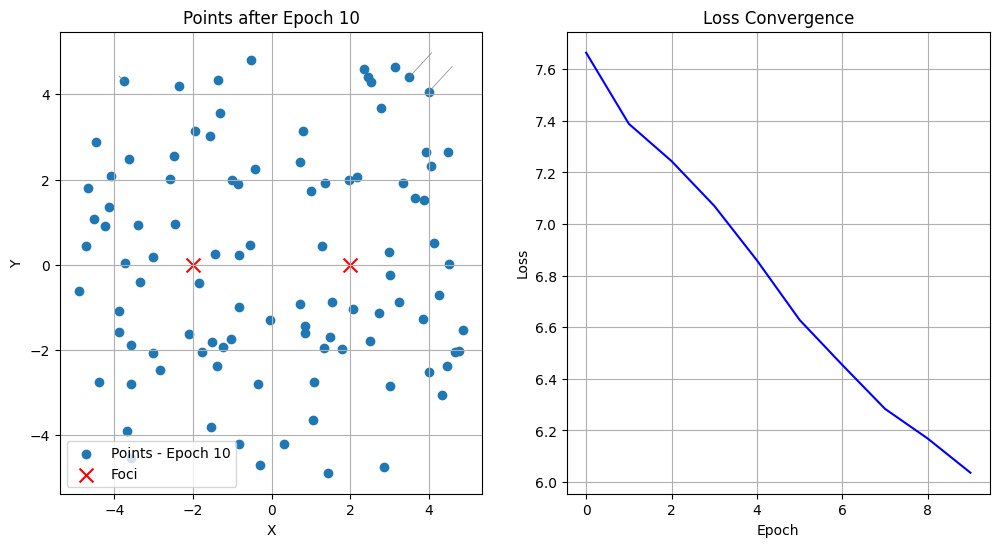

Epoch 10: Loss = 6.036137


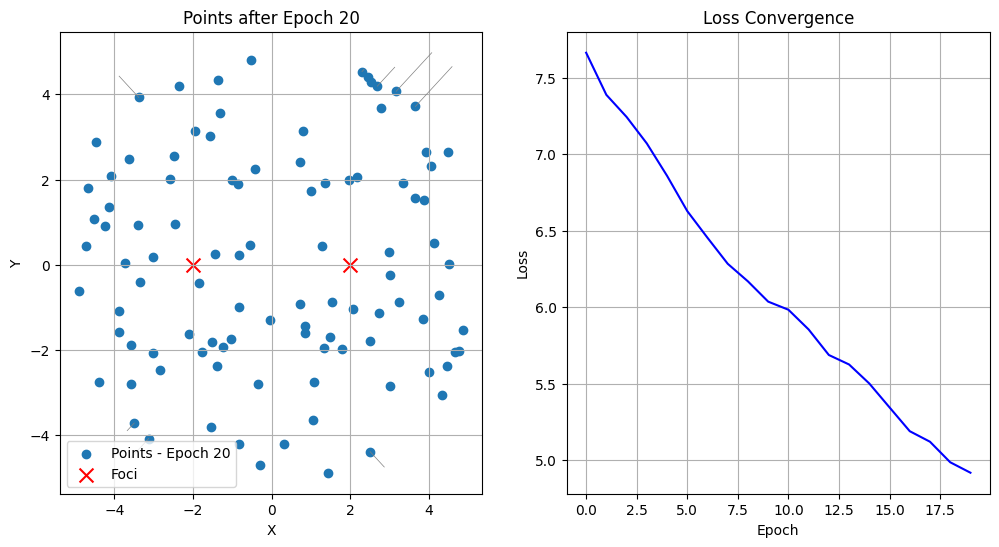

Epoch 20: Loss = 4.917074


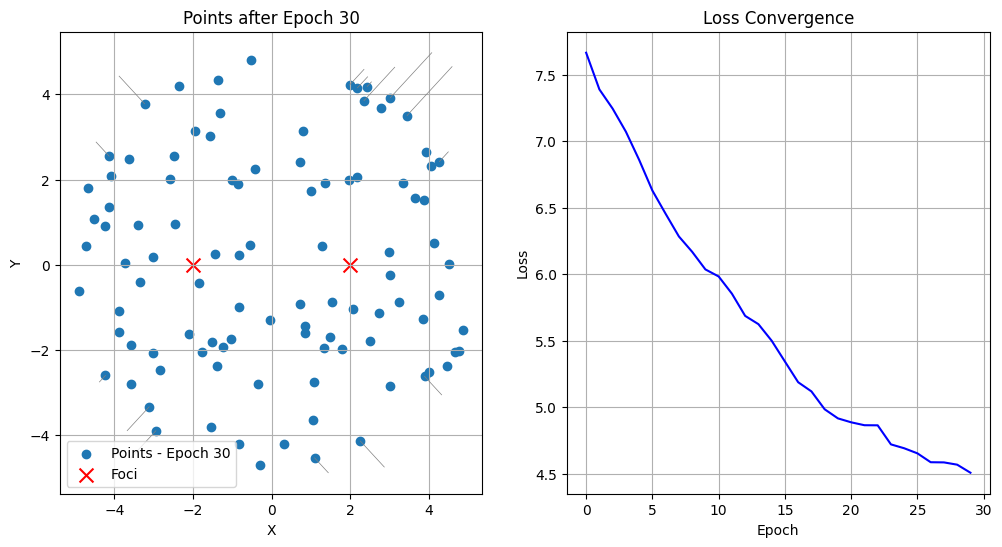

Epoch 30: Loss = 4.508827


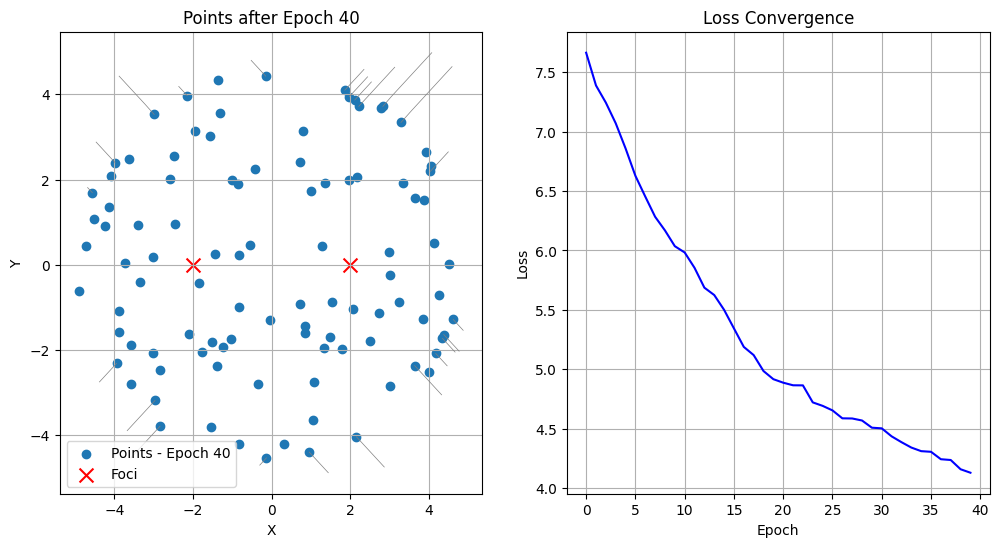

Epoch 40: Loss = 4.129930


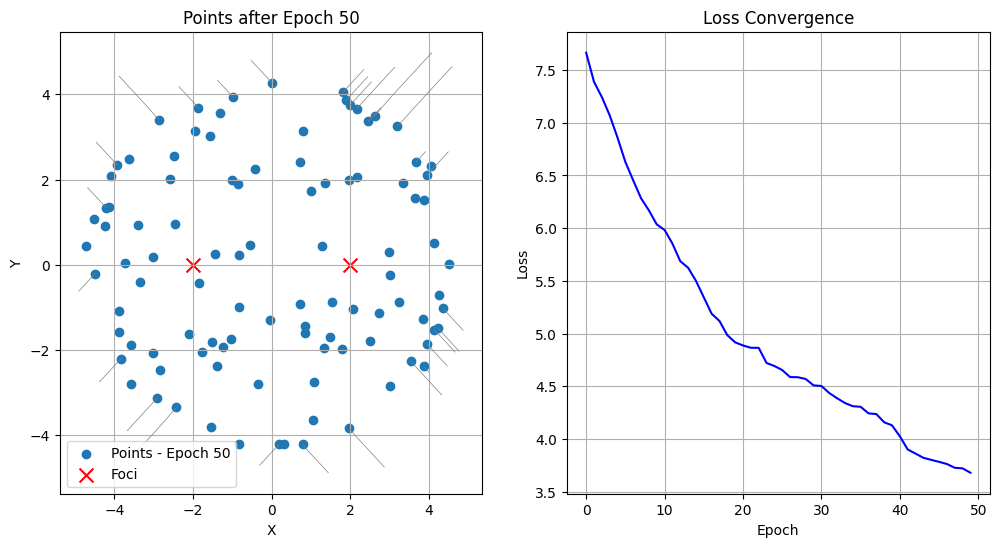

Epoch 50: Loss = 3.680521


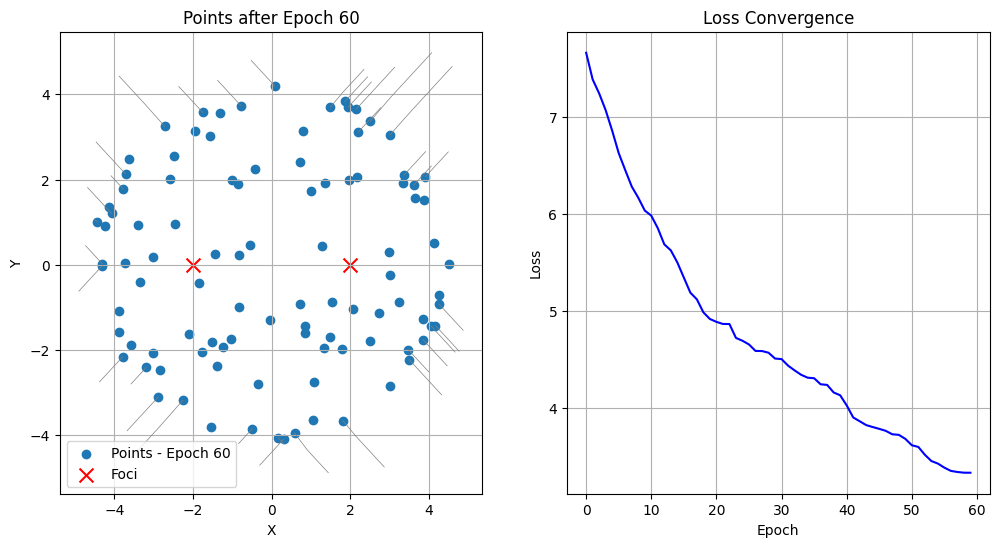

Epoch 60: Loss = 3.331045


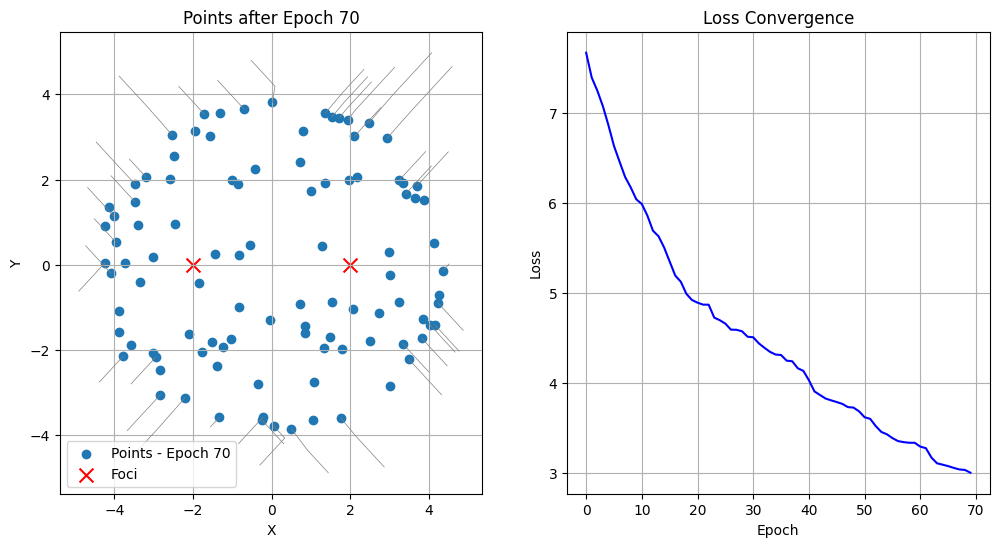

Epoch 70: Loss = 2.998560


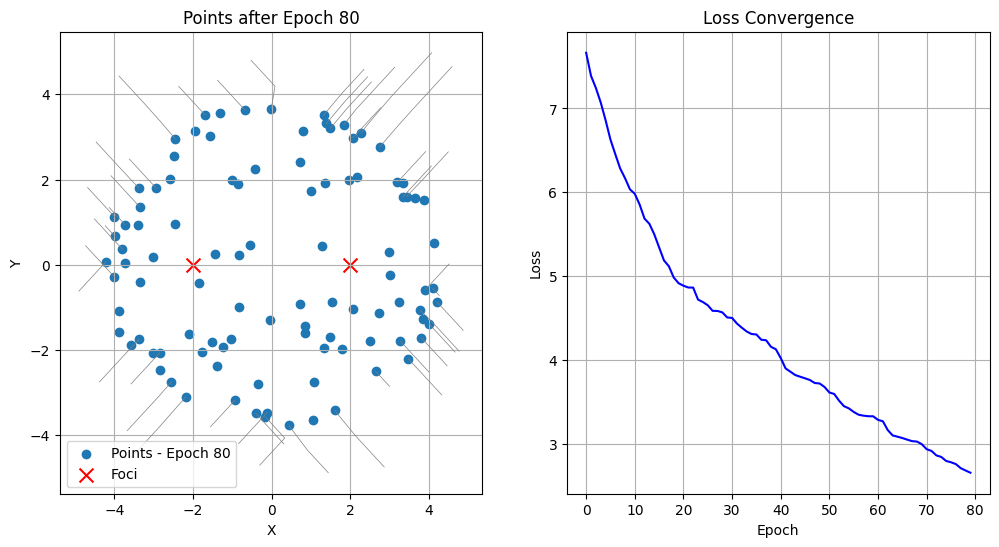

Epoch 80: Loss = 2.658379


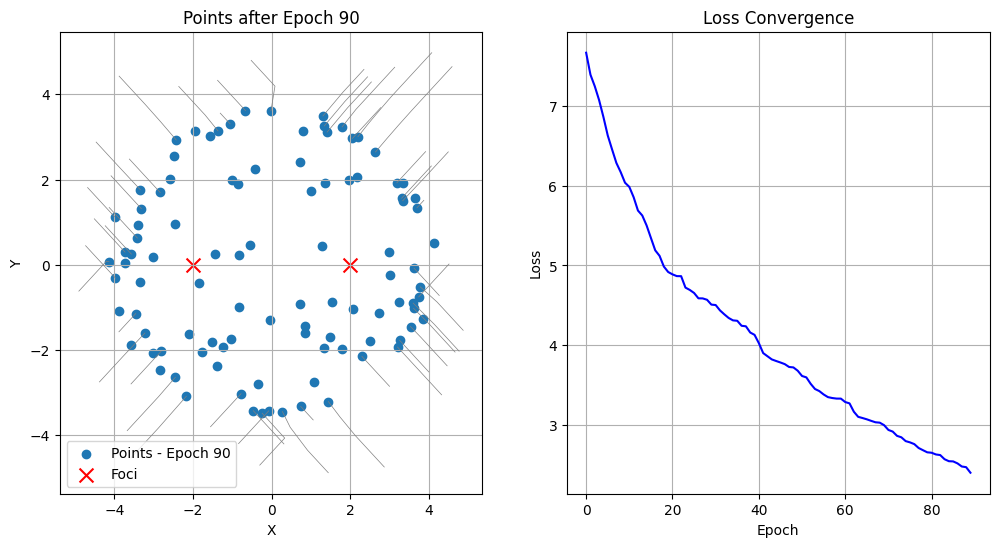

Epoch 90: Loss = 2.402779


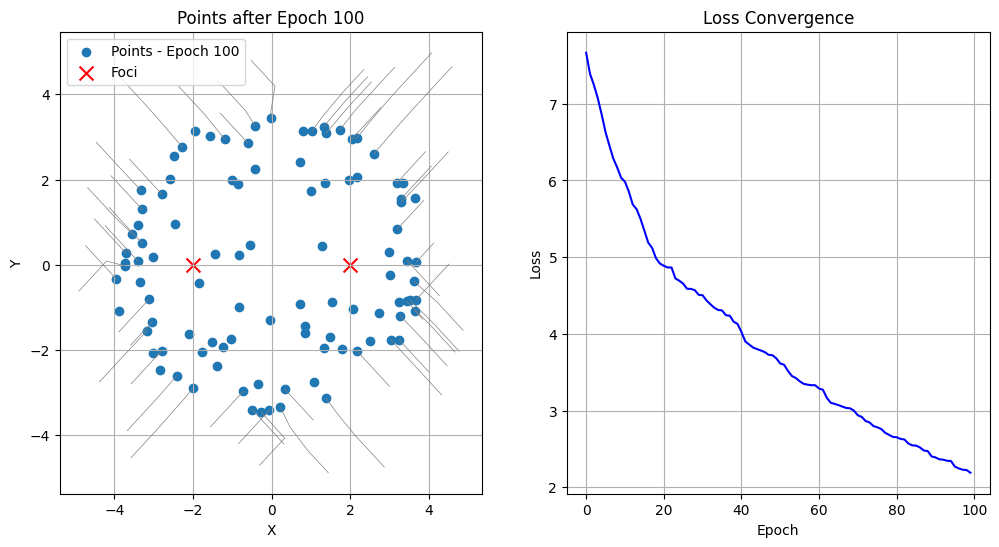

Epoch 100: Loss = 2.190766
Elapsed time: 5.849016189575195 seconds


In [ ]:
trajectories = [[] for _ in range(num_points)]
loss_linf_history = []
num_points = 100
points = torch.rand((num_points, 2)) * 10 - 5  # Uniformly distributed in [-5, 5]
points.requires_grad = True

import time
# Start timing
start_time = time.time()

# starting
plot_starting(points)

# Define optimizer
optimizer = torch.optim.Adam([points], lr=0.1)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    dist1 = torch.norm(points - focus1, dim=1)
    dist2 = torch.norm(points - focus2, dim=1)
    loss_linf = torch.max(torch.abs(dist1 + dist2 - constant_sum))

    loss_linf.backward()
    optimizer.step()
    loss_linf_history.append(loss_linf.item())
    optimizer.zero_grad()
    for i in range(num_points):
        trajectories[i].append(points[i].detach().cpu().clone().numpy())

    # Plot results every 10th epoch
    if (epoch+1) % 10 == 0:
        plot_results(epoch+1, trajectories, loss_linf_history)

    if (epoch +1) % 10 == 0:
        print(f"Epoch {epoch+1}: Loss = {loss_linf.item():.6f}")


# End timing
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

The question for you to answer in relation to  L^∞ ellipse  is why the training takes so long and it doesn't converge in the end, either.

Przyglądając się funkcji straty widzimy, że uwzględnia ona położenie jedynie najodległejszego punktu. W związku z tym wiemy, że po każdej epoce poprawia się położenie outliera, ale pozostałe punkty nie wpływają na funkcję straty, zatem nie zmienia się ich położenie po jednej iteracji. Stąd metoda ta jest bardzo powolna i szczególnie nieużyteczna przy liczbie punktów bliskiej bądź większej od liczby epok. Oczywiście wyniki są lepsze gdy przesuwamy każdy punkt wielokrotnie, co we wspomnianym przypadku nie zajdzie, co ukazuje wizualizacja powyżej, w którym dostrzegamy niewielką liczbę szarych linii. Wynik zapewne nieco poprawi zwiększenie parametru uczenia, bo punkty nie są w stanie niewielką liczbą kroków tej wielkości zbliżyć się do preferowanych pozycji.

# $L^0$ nie działa (powody omówione w dalszej części)

In [ ]:
'''trajectories = [[] for _ in range(num_points)]
loss_l0_history = []
num_points = 100
points = torch.rand((num_points, 2)) * 10 - 5  # Uniformly distributed in [-5, 5]
points.requires_grad = True

import time
# Start timing
start_time = time.time()

# starting
plot_starting(points)

# Define optimizer
optimizer = torch.optim.Adam([points], lr=0.1)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    dist1 = torch.norm(points - focus1, dim=1)
    dist2 = torch.norm(points - focus2, dim=1)
    loss_l0= torch.mean((dist1 + dist2 != constant_sum).float())
    print( loss_l0)

    loss_l0.backward()
    optimizer.step()
    loss_l0_history.append(loss_l0.item())
    optimizer.zero_grad()
    for i in range(num_points):
        trajectories[i].append(points[i].detach().cpu().clone().numpy())

    # Plot results every 10th epoch
    if (epoch+1) % 10 == 0:
        plot_results(epoch+1, trajectories, loss_l0_history)

    if (epoch +1) % 10 == 0:
        print(f"Epoch {epoch+1}: Loss = {loss_l0.item():.6f}")


# End timing
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time'''

'trajectories = [[] for _ in range(num_points)]\nloss_l0_history = []\nnum_points = 100\npoints = torch.rand((num_points, 2)) * 10 - 5  # Uniformly distributed in [-5, 5]\npoints.requires_grad = True\n\nimport time\n# Start timing\nstart_time = time.time()\n\n# starting\nplot_starting(points)\n\n# Define optimizer\noptimizer = torch.optim.Adam([points], lr=0.1)\n\n# Training loop\nnum_epochs = 100\nfor epoch in range(num_epochs):\n    optimizer.zero_grad()\n    dist1 = torch.norm(points - focus1, dim=1)\n    dist2 = torch.norm(points - focus2, dim=1)\n    loss_l0= torch.mean((dist1 + dist2 != constant_sum).float())\n    print( loss_l0)\n\n    loss_l0.backward()\n    optimizer.step()\n    loss_l0_history.append(loss_l0.item())\n    optimizer.zero_grad()\n    for i in range(num_points):\n        trajectories[i].append(points[i].detach().cpu().clone().numpy())\n\n    # Plot results every 10th epoch\n    if (epoch+1) % 10 == 0:\n        plot_results(epoch+1, trajectories, loss_l0_history)\

Okazuje się że taka postać nieróżniczkowalnej, a nawet nieciągłej funkcji nie pozwala na liczenie gradientów w pytorch. Zastanówmy się jednak czy możemy użyć aproksymacji tej funkcji i otrzymać porządane rezultaty.

# Aproksymacja $L^0$

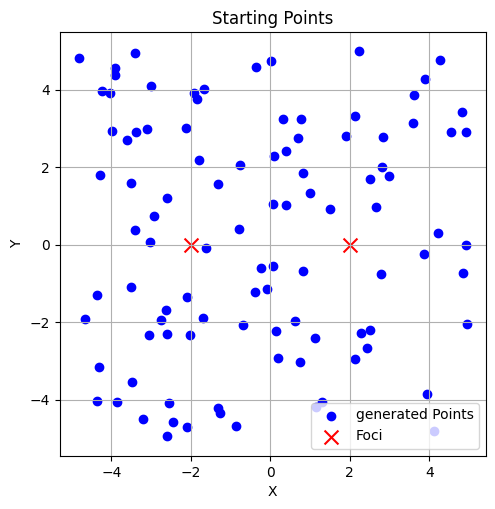

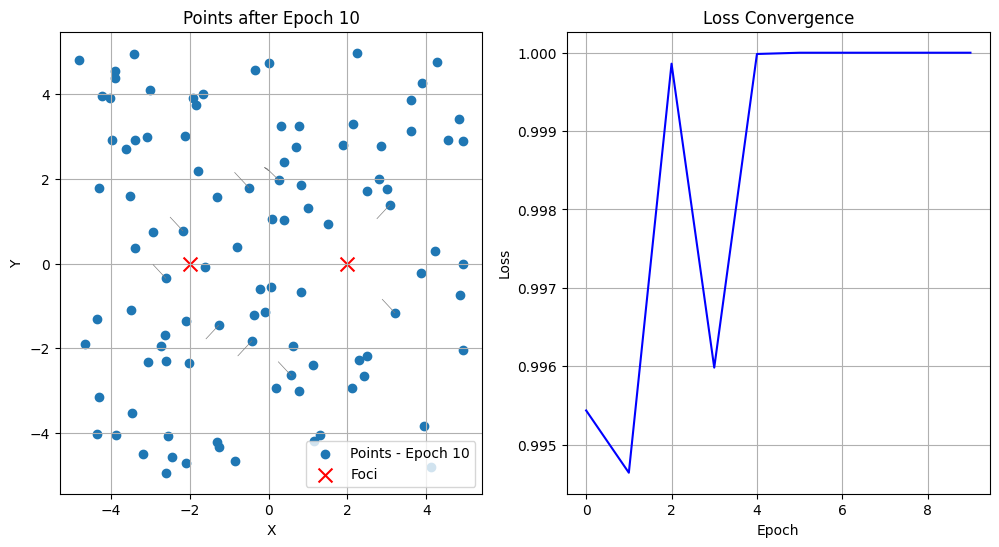

Epoch 10: Loss = 1.000000


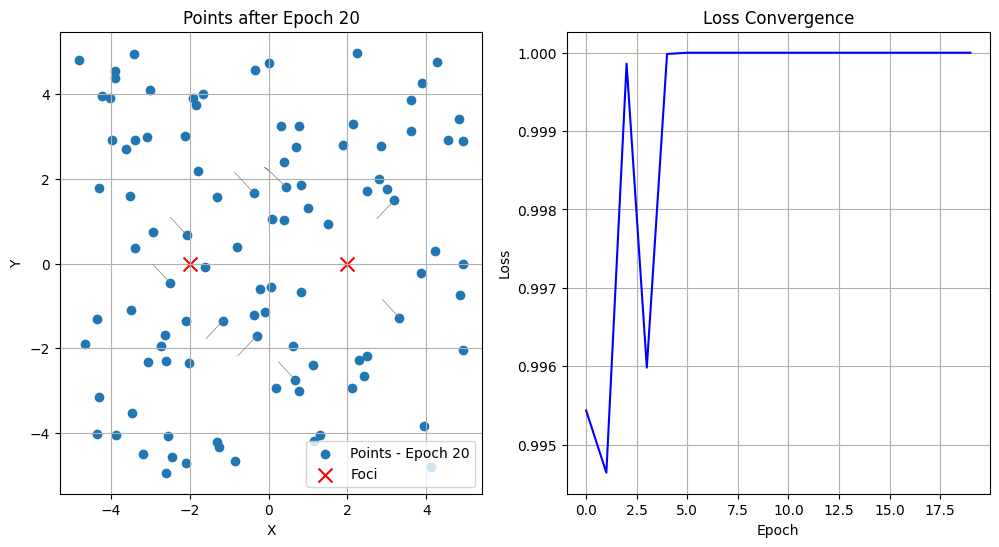

Epoch 20: Loss = 1.000000


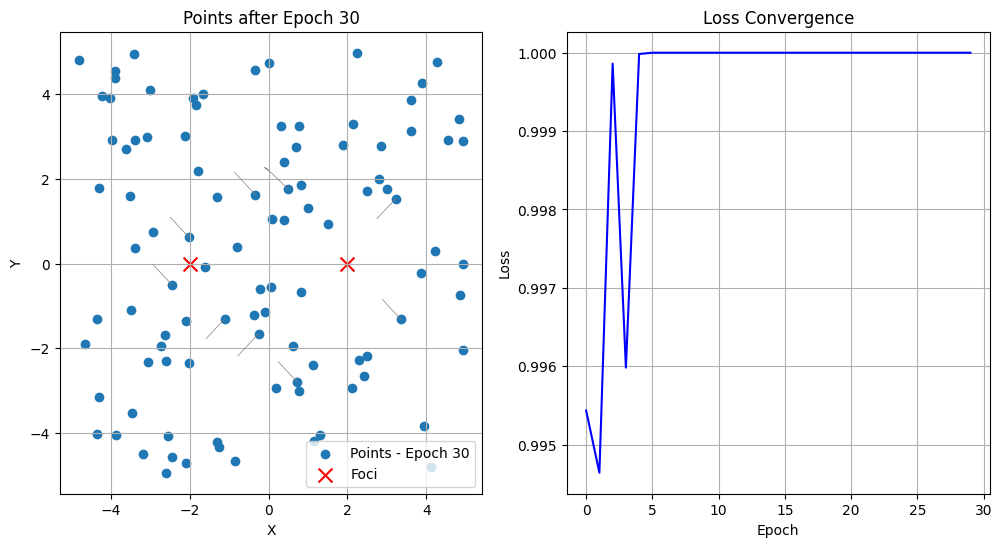

Epoch 30: Loss = 1.000000


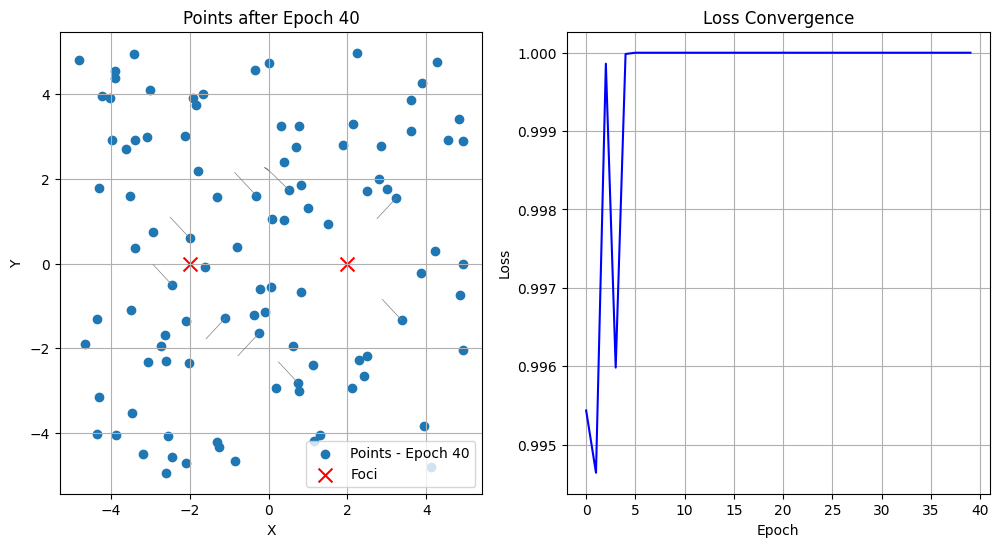

Epoch 40: Loss = 1.000000


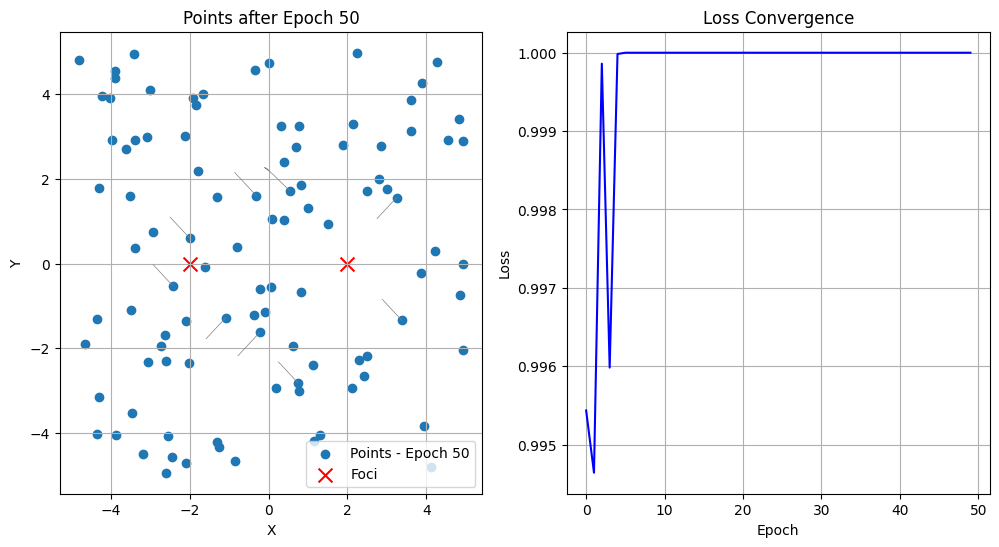

Epoch 50: Loss = 1.000000


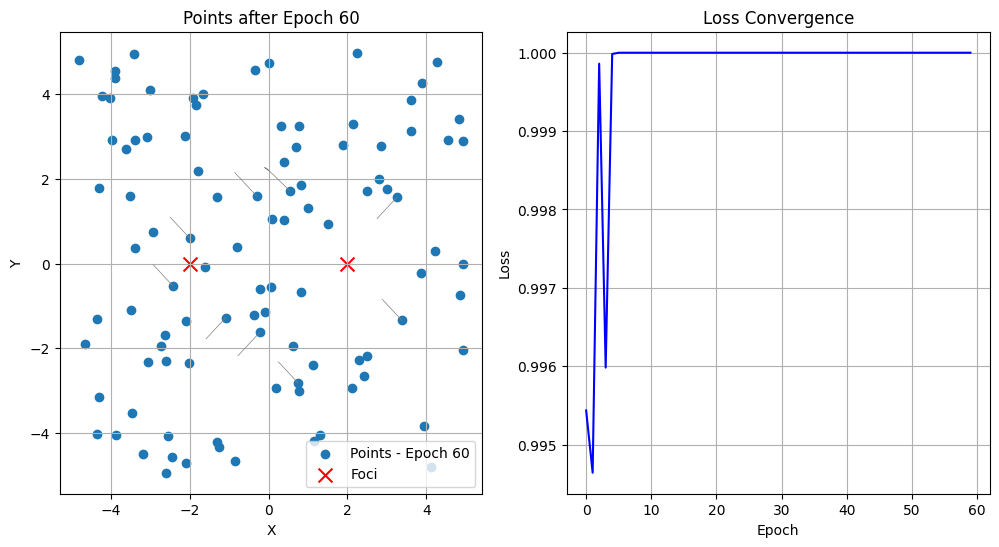

Epoch 60: Loss = 1.000000


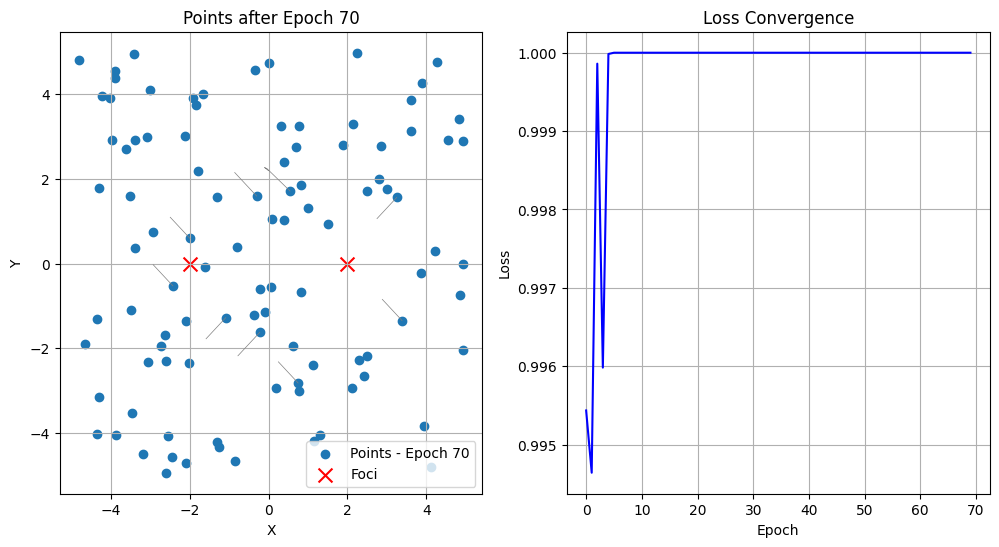

Epoch 70: Loss = 1.000000


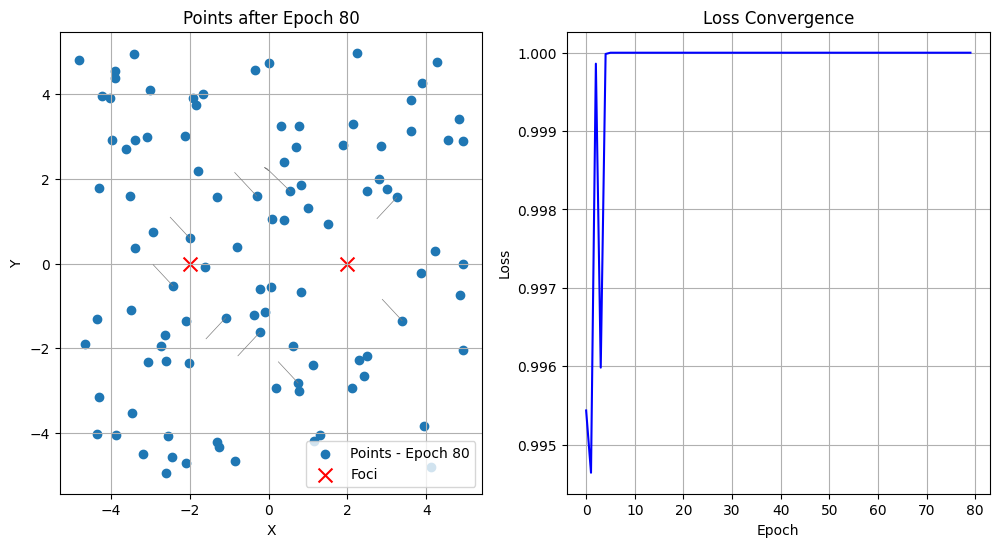

Epoch 80: Loss = 1.000000


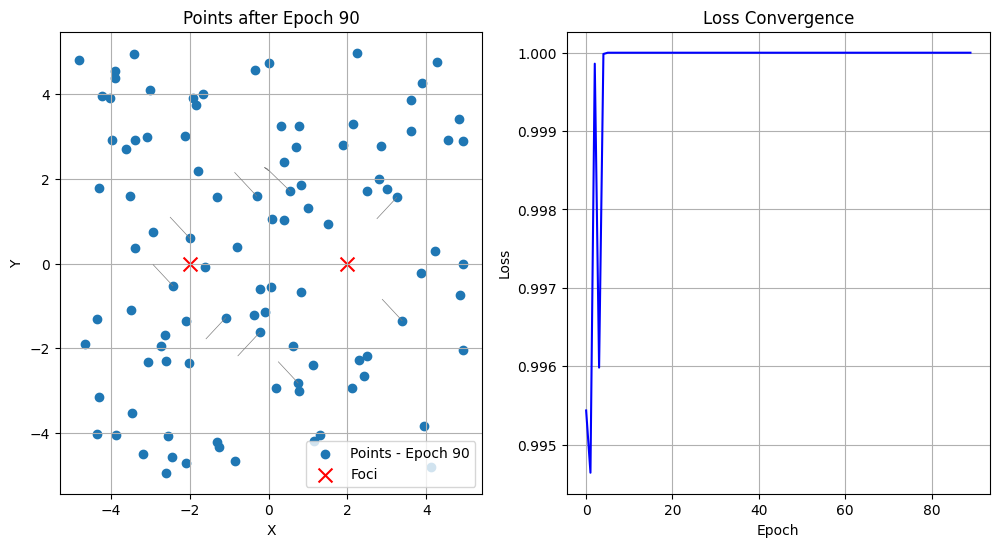

Epoch 90: Loss = 1.000000


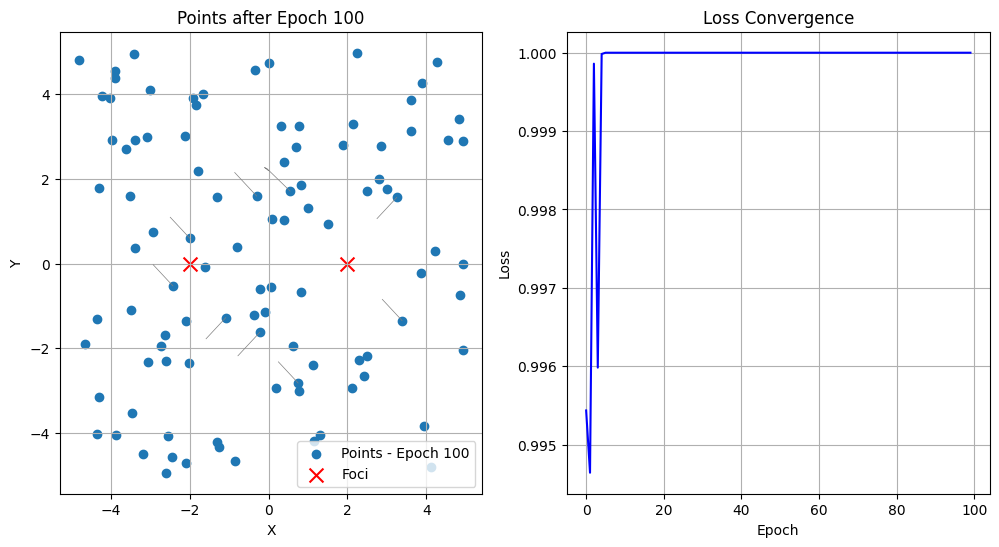

Epoch 100: Loss = 1.000000


In [ ]:
trajectories = [[] for _ in range(num_points)]
loss_l0_history = []
num_points = 100
points = torch.rand((num_points, 2)) * 10 - 5  # Uniformly distributed in [-5, 5]
points.requires_grad = True

import time
# Start timing
start_time = time.time()

# starting
plot_starting(points)

# Define optimizer
optimizer = torch.optim.Adam([points], lr=0.1)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    dist1 = torch.norm(points - focus1, dim=1)
    dist2 = torch.norm(points - focus2, dim=1)
    difference = dist1 + dist2 - constant_sum

    epsilon = 1e-2  # small margin for tolerance
    k = 100
    loss_l0 = torch.mean(torch.sigmoid(k * (difference.abs() - epsilon)))

    loss_l0.backward()
    optimizer.step()
    loss_l0_history.append(loss_l0.item())
    optimizer.zero_grad()
    for i in range(num_points):
        trajectories[i].append(points[i].detach().cpu().clone().numpy())

    # Plot results every 10th epoch
    if (epoch+1) % 10 == 0:
        plot_results(epoch+1, trajectories, loss_l0_history)

    if (epoch +1) % 10 == 0:
        print(f"Epoch {epoch+1}: Loss = {loss_l0.item():.6f}")


# End timing
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

Powyższa aproksymanta przyjmuje wartość bliską 0 dla punktów bardzo blisko elipsy i 1 poza "sąsiedztwem" elipsy.

If you actually succeed to code this loss function, the question for you to answer in relation to  $L^1$ ellipse  is why the training is not progressing with passing epochs.
If you actually fail to code this loss function, the question for you to answer is to explain the failure and reason out theoretically, why the training would not be progressing with passing epochs, anyway.

Prawdopodobieństwo wylosowania punktów na elipsie jest 0, Stąd dla prawie wszystkich wylosowanych punktów wartość składnika funkcji za którego jest odpowiedzialna jest bliska 1, a taka funkcja jest w przybliżeniu stała w ich otoczeniu. Gradient funkcji stałej jest zerowy, co z kolei wpływa na brak aktualizacji położenia punktów. Dlatego ogólna wartość funkcji straty jest stale bliska jeden.